In [53]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys, cv2, glob, os, time
import pandas as pd 
import io
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten,Activation
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
import matplotlib.pyplot as plt

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding


In [2]:
data=pd.read_csv('02-28-2018.csv')
data

C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\1616595013.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('02-28-2018.csv')


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613099,23,6,28/02/2018 11:59:12,3,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613100,425,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613101,445,6,28/02/2018 12:52:55,732728,2,2,0,0,0,0,...,32,0,0,0,0,0,0,0,0,Benign
613102,23,6,28/02/2018 11:10:50,22,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration


In [3]:
data=data.drop('Timestamp',axis=1)

In [4]:
data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,94658,6,7,708,3718,387,0,118.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,206,2,0,0,0,0,0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,165505,3,1,0,0,0,0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,102429,6,7,708,3718,387,0,118.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,167,2,0,0,0,0,0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613099,23,6,3,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613100,425,6,2,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613101,445,6,732728,2,2,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,Benign
613102,23,6,22,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration


In [5]:
from collections import Counter
Counter(data['Label'])

Counter({'Benign': 544200, 'Label': 33, 'Infilteration': 68871})

In [6]:
# replace +ve and -ve infinity with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
# drop missing values
data.dropna(inplace=True)

In [8]:
mask = data['Label'] != 'Label'
data = data.drop(data[~mask].index)

In [9]:
data.replace(to_replace=["Infilteration"], value="Malicious", inplace=True)

In [10]:
data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,94658,6,7,708,3718,387,0,118.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,206,2,0,0,0,0,0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,165505,3,1,0,0,0,0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,102429,6,7,708,3718,387,0,118.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,167,2,0,0,0,0,0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613099,23,6,3,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Malicious
613100,425,6,2,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Malicious
613101,445,6,732728,2,2,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,Benign
613102,23,6,22,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Malicious


In [11]:
dataF1=data.loc[data['Label'] == 'Benign']
print(len(dataF1))
dataF2=data.loc[data['Label'] == 'Malicious']
print(len(dataF2))

539354
68336


In [12]:
dataF1=dataF1[:20000]
dataF2=dataF2[:3000]

In [13]:
dataF=dataF2.append(dataF1,ignore_index = True) 

C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\3980289919.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataF=dataF2.append(dataF1,ignore_index = True)


In [14]:
from collections import Counter
Counter(dataF["Label"])

Counter({'Malicious': 3000, 'Benign': 20000})

In [15]:

Target=dataF["Label"]
Feature=dataF.drop(["Label"], axis=1)

In [16]:
Feature

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,6,198,3,0,77,0,46,0,25.66666667,...,1,20,0,0,0,0,0,0,0,0
1,443,6,223,3,0,77,0,46,0,25.66666667,...,1,20,0,0,0,0,0,0,0,0
2,443,6,587,3,0,77,0,46,0,25.66666667,...,1,20,0,0,0,0,0,0,0,0
3,443,6,763,3,0,77,0,46,0,25.66666667,...,1,20,0,0,0,0,0,0,0,0
4,443,6,852,3,0,77,0,46,0,25.66666667,...,1,20,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,445,6,449562,3,1,0,0,0,0,0,...,0,20,0,0,0,0,0,0,0,0
22996,55534,6,17,1,1,0,0,0,0,0,...,0,20,0,0,0,0,0,0,0,0
22997,53,17,305,1,1,51,67,51,51,51,...,0,8,0,0,0,0,0,0,0,0
22998,53,17,1051,1,1,68,150,68,68,68,...,0,8,0,0,0,0,0,0,0,0


In [17]:
from collections import Counter
Counter(Target)

Counter({'Malicious': 3000, 'Benign': 20000})

In [18]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
Feature=Feature.astype('str')
dataFeatures=Feature.apply(LabelEncoder().fit_transform)

ETC


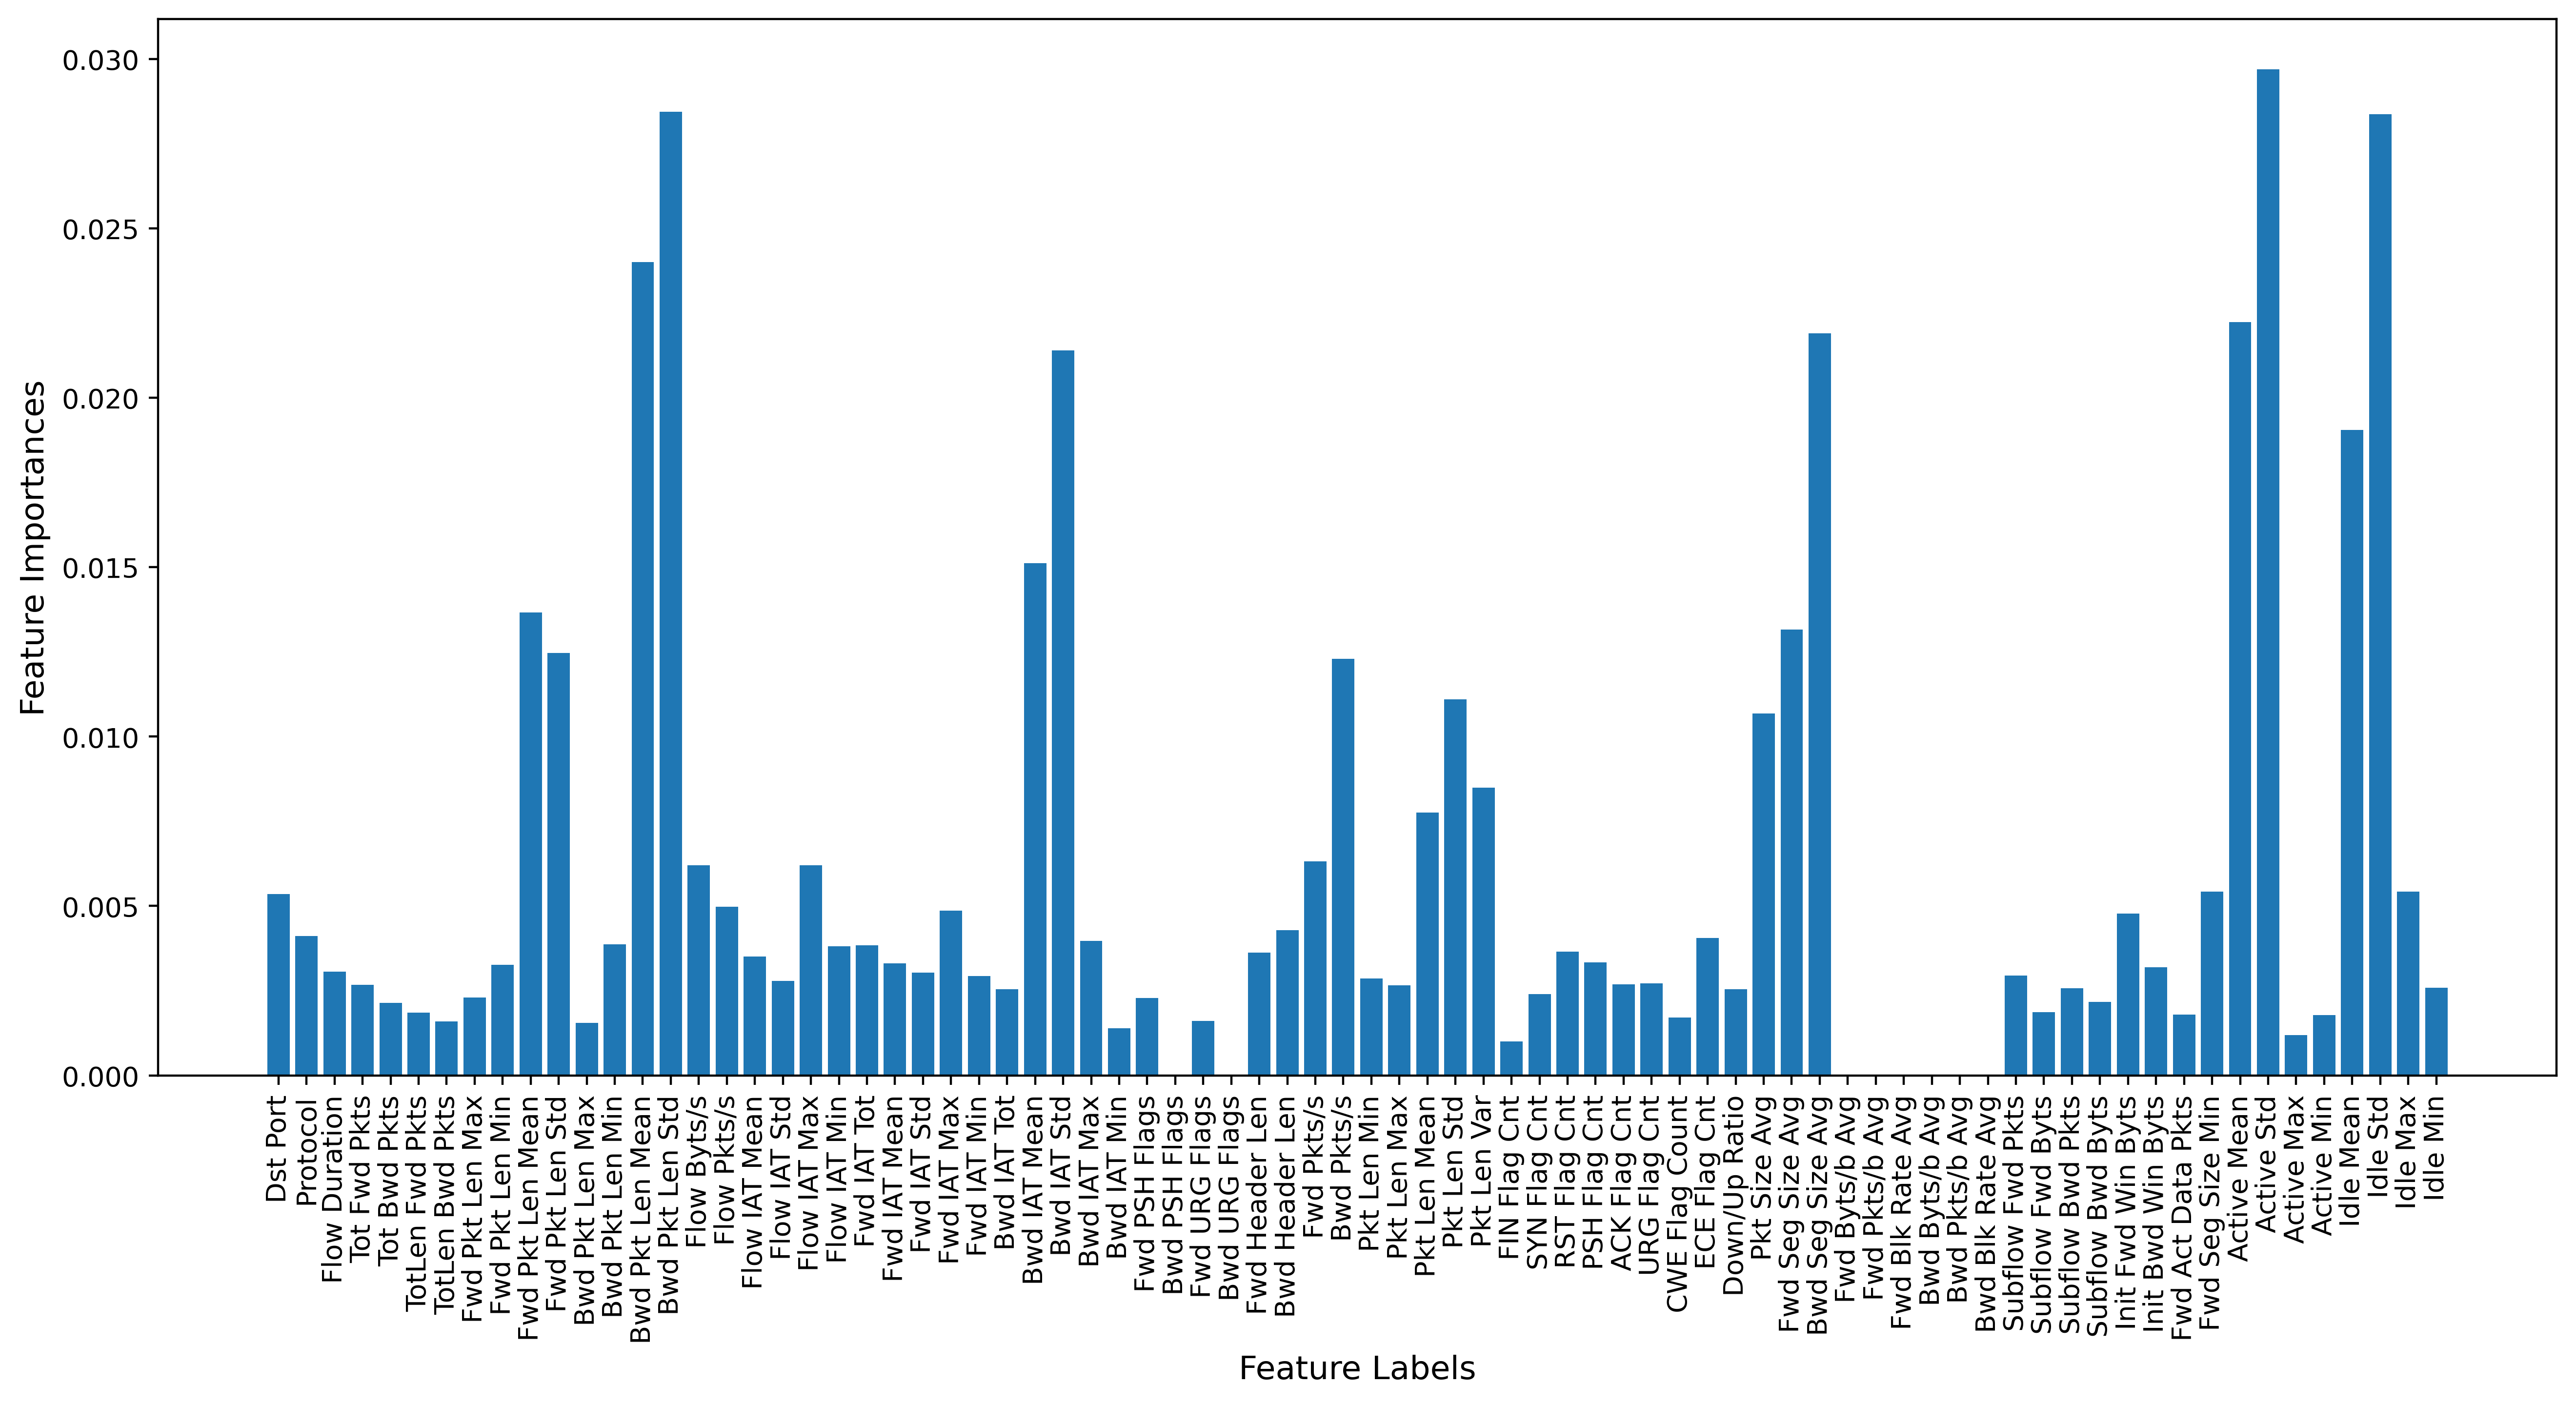

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=30)

X =dataFeatures

y =  Target
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(13,7),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('UNSWFeature.pdf')
plt.show()

In [20]:
featuresimpF=[]
for i in range (len(X.columns)):
    if feature_importance_normalized[i]>0.005:
        featuresimpF.append(X.columns[i])
len(featuresimpF)        

23

In [21]:
dataFFeatures= dataFeatures[featuresimpF[:20]]

In [22]:
dataFFeatures

,Dst Port,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow IAT Max,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Seg Size Min,Active Mean,Active Std
0,166,672,1271,0,0,8891,3834,0,0,6340,0,1684,318,2740,2190,672,0,1,0,0
1,166,672,1271,0,0,8304,4566,0,0,5945,0,1684,318,2740,2190,672,0,1,0,0
2,166,672,1271,0,0,2324,9585,0,0,11502,0,1684,318,2740,2190,672,0,1,0,0
3,166,672,1271,0,0,213,11093,0,0,9669,0,1684,318,2740,2190,672,0,1,0,0
4,166,672,1271,0,0,15158,11353,0,0,9324,0,1684,318,2740,2190,672,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,168,0,0,0,0,0,7557,0,0,12428,5729,0,0,0,0,0,0,1,0,0
22996,1818,0,0,0,0,0,3343,0,0,12125,10589,0,0,0,0,0,0,1,0,0
22997,1203,1150,0,2042,0,8871,7576,0,0,9128,7484,2464,3343,3160,2934,1150,2042,7,0,0
22998,1203,1552,0,369,0,5445,1222,0,0,15384,13517,3156,1978,1462,357,1552,369,7,0,0


In [23]:
a=[]
for i in range(20):
    a.append(i)

In [24]:

dataFFeatures.columns=a


In [25]:
newfeatures=dataFFeatures.copy()

In [26]:
Target

0        Malicious
1        Malicious
2        Malicious
3        Malicious
4        Malicious
           ...    
22995       Benign
22996       Benign
22997       Benign
22998       Benign
22999       Benign
Name: Label, Length: 23000, dtype: object

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ScDATA=scaler.fit_transform(dataFFeatures)


In [28]:
newfeatures=pd.DataFrame(ScDATA)

In [29]:
newfeatures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.062476,0.326531,0.540621,0.000000,0.0,0.560028,0.314417,0.0,0.0,0.409111,0.000000,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0
1,0.062476,0.326531,0.540621,0.000000,0.0,0.523054,0.374446,0.0,0.0,0.383623,0.000000,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0
2,0.062476,0.326531,0.540621,0.000000,0.0,0.146384,0.786042,0.0,0.0,0.742208,0.000000,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0
3,0.062476,0.326531,0.540621,0.000000,0.0,0.013416,0.909710,0.0,0.0,0.623927,0.000000,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0
4,0.062476,0.326531,0.540621,0.000000,0.0,0.954775,0.931032,0.0,0.0,0.601665,0.000000,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,0.063229,0.000000,0.000000,0.000000,0.0,0.000000,0.619731,0.0,0.0,0.801962,0.420817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0
22996,0.684230,0.000000,0.000000,0.000000,0.0,0.000000,0.274151,0.0,0.0,0.782409,0.777802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0
22997,0.452766,0.558795,0.000000,0.850125,0.0,0.558768,0.621289,0.0,0.0,0.589017,0.549728,0.770000,0.994053,0.961363,0.939782,0.558795,0.850125,1.000000,0.0,0.0
22998,0.452766,0.754130,0.000000,0.153622,0.0,0.342971,0.100213,0.0,0.0,0.992708,0.992875,0.986250,0.588165,0.444782,0.114350,0.754130,0.153622,1.000000,0.0,0.0


In [30]:
newfeatures['target']=Target
Data25=newfeatures
dataF9=Data25.loc[Data25['target'] == "Malicious"]
print(len(dataF9))
dataF10=Data25.loc[Data25['target'] == "Benign"]
print(len(dataF10))

3000
20000


In [31]:
dataF9

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.062476,0.326531,0.540621,0.000000,0.000000,0.560028,0.314417,0.000000,0.000000,0.409111,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
1,0.062476,0.326531,0.540621,0.000000,0.000000,0.523054,0.374446,0.000000,0.000000,0.383623,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
2,0.062476,0.326531,0.540621,0.000000,0.000000,0.146384,0.786042,0.000000,0.000000,0.742208,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
3,0.062476,0.326531,0.540621,0.000000,0.000000,0.013416,0.909710,0.000000,0.000000,0.623927,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
4,0.062476,0.326531,0.540621,0.000000,0.000000,0.954775,0.931032,0.000000,0.000000,0.601665,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.452766,0.454810,0.000425,0.008743,0.000423,0.551272,0.676316,0.000125,0.000134,0.538878,...,0.804688,0.238478,0.063280,0.976938,0.454810,0.008743,1.000000,0.000252,0.000397,Malicious
2996,0.452766,0.361030,0.000425,0.664030,0.000423,0.834467,0.113006,0.000125,0.000134,0.984449,...,0.606250,0.994053,0.961059,0.783472,0.361030,0.664030,1.000000,0.000252,0.000397,Malicious
2997,0.063229,0.517493,0.724373,0.606162,0.401185,0.500756,0.768493,0.577192,0.025418,0.573595,...,0.655000,0.627713,0.507454,0.728379,0.517493,0.606162,0.142857,0.000252,0.000397,Malicious
2998,0.063229,0.396987,0.712888,0.675271,0.573847,0.206286,0.613006,0.774419,0.035452,0.295218,...,0.636875,0.694023,0.575297,0.705637,0.396987,0.675271,0.142857,0.000252,0.000397,Malicious


In [32]:
len(newfeatures)

23000

In [33]:
dataF9.columns = dataF9.columns.astype(str)
dataF10.columns = dataF10.columns.astype(str)

In [34]:
dataF9['target'] = dataF9['target'].map({'Malicious':0})
dataF9

C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\3643418640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF9['target'] = dataF9['target'].map({'Malicious':0})


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.062476,0.326531,0.540621,0.000000,0.000000,0.560028,0.314417,0.000000,0.000000,0.409111,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
1,0.062476,0.326531,0.540621,0.000000,0.000000,0.523054,0.374446,0.000000,0.000000,0.383623,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
2,0.062476,0.326531,0.540621,0.000000,0.000000,0.146384,0.786042,0.000000,0.000000,0.742208,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
3,0.062476,0.326531,0.540621,0.000000,0.000000,0.013416,0.909710,0.000000,0.000000,0.623927,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
4,0.062476,0.326531,0.540621,0.000000,0.000000,0.954775,0.931032,0.000000,0.000000,0.601665,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.452766,0.454810,0.000425,0.008743,0.000423,0.551272,0.676316,0.000125,0.000134,0.538878,...,0.804688,0.238478,0.063280,0.976938,0.454810,0.008743,1.000000,0.000252,0.000397,0
2996,0.452766,0.361030,0.000425,0.664030,0.000423,0.834467,0.113006,0.000125,0.000134,0.984449,...,0.606250,0.994053,0.961059,0.783472,0.361030,0.664030,1.000000,0.000252,0.000397,0
2997,0.063229,0.517493,0.724373,0.606162,0.401185,0.500756,0.768493,0.577192,0.025418,0.573595,...,0.655000,0.627713,0.507454,0.728379,0.517493,0.606162,0.142857,0.000252,0.000397,0
2998,0.063229,0.396987,0.712888,0.675271,0.573847,0.206286,0.613006,0.774419,0.035452,0.295218,...,0.636875,0.694023,0.575297,0.705637,0.396987,0.675271,0.142857,0.000252,0.000397,0


In [35]:
def dimRed(df):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    #replace the lable with 1
    Mini=df
    i=0
    features=df.drop('target',axis=1)
    target=df['target']
    #find distance
    svd = PCA(n_components=2)
    #prepare transform on dataset
    svd.fit(features)
    pca_result = svd.transform(features)
    df['pca-one'] = pca_result[:,0]
    df['pca-two'] = pca_result[:,1] 
    #create datafram of distance
    Z=df[['pca-one','pca-two']]
    Z['target']=target
    #create dumy dataframe of original values
    Mini=Mini.drop(['pca-one','pca-two'], axis=1)
    #Z=X.loc[X['attack_cat'] == 1]
    Z=Z.reset_index()
    Mini=Mini.reset_index()
    Mini=Mini.drop('index', axis=1)
    print(Z.shape)
    print(Mini.shape)
    return Z, Mini


In [39]:
import random
Z, Mini=dimRed(dataF9)

import random
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import pairwise_distances
arr=[]
import math
import statistics
# l will suppot to generate data more than its acutal lenght
l=0
for i in range(2990):
    print(i)
    if(l<len(dataF9)):    
        print(dataF9.shape)
        print(Z.shape)
        print(Mini.shape)
        print(l)
        Z['distance']=0
        Z['distance']=pairwise_distances(Z[i:i+1],Z[:]).reshape(-1)
        #distance measure
        #for j in range(len(Z)):
           # Z['distance'][j]=math.dist([Z['pca-one'][l], Z['pca-one'][l]],[Z['pca-two'][j], Z['pca-two'][j]])
        #get the points and to measure the smilarlty
        #P1=Mini.iloc[Z['distance'][l:].idxmin(),l]
        #P2=Mini.iloc[l]
        a=[]
        #for k in range(len(P1)):
            #a.append(statistics.mean([P1[k],P2[k]]))
        #    a.append((P1[k]+P2[k])/2)
        a=Mini.iloc[[Z['distance'][l+1:].idxmin(),Z['distance'][l+1:].nsmallest(2).index[1],l]].mean(axis=0)
        #num1=random.uniform(0.1, 1)
        #a1=a*num1
        arr.append(a)
        l=l+1

    else:
        Genrated=pd.DataFrame(arr)
        print(Genrated)
        new_header = Mini.columns #grab the first row for the header
        Genrated.columns = new_header #set the header row as the df header
        Genrated['target']=Genrated['target']
        dataF9=dataF9.drop(['pca-one','pca-two'], axis=1)
        dataF9=Genrated.append(dataF9,ignore_index = True)
        #print(dataF9)
        print(dataF9.shape)
        Z, Mini=dimRed(dataF9)
        dataF9=dataF9.reset_index()
        dataF9=dataF9.drop('index',axis=1)
        arr.clear()
        l=0
        
Genrated=pd.DataFrame(arr)
new_header = Mini.columns #grab the first row for the header
Genrated.columns = new_header #set the header row as the df header
Genrated['target']=Genrated['target'].astype(int)
dataF9=dataF9.drop(['pca-one','pca-two'], axis=1)
dataF9=Genrated.append(dataF9,ignore_index = True)

C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\3994028085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca-one'] = pca_result[:,0]
C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\3994028085.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca-two'] = pca_result[:,1]
C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\3994028085.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

(3000, 4)
(3000, 21)
0
(3000, 23)
(3000, 4)
(3000, 21)
0
1
(3000, 23)
(3000, 5)
(3000, 21)
1
2
(3000, 23)
(3000, 5)
(3000, 21)
2
3
(3000, 23)
(3000, 5)
(3000, 21)
3
4
(3000, 23)
(3000, 5)
(3000, 21)
4
5
(3000, 23)
(3000, 5)
(3000, 21)
5
6
(3000, 23)
(3000, 5)
(3000, 21)
6
7
(3000, 23)
(3000, 5)
(3000, 21)
7
8
(3000, 23)
(3000, 5)
(3000, 21)
8
9
(3000, 23)
(3000, 5)
(3000, 21)
9
10
(3000, 23)
(3000, 5)
(3000, 21)
10
11
(3000, 23)
(3000, 5)
(3000, 21)
11
12
(3000, 23)
(3000, 5)
(3000, 21)
12
13
(3000, 23)
(3000, 5)
(3000, 21)
13
14
(3000, 23)
(3000, 5)
(3000, 21)
14
15
(3000, 23)
(3000, 5)
(3000, 21)
15
16
(3000, 23)
(3000, 5)
(3000, 21)
16
17
(3000, 23)
(3000, 5)
(3000, 21)
17
18
(3000, 23)
(3000, 5)
(3000, 21)
18
19
(3000, 23)
(3000, 5)
(3000, 21)
19
20
(3000, 23)
(3000, 5)
(3000, 21)
20
21
(3000, 23)
(3000, 5)
(3000, 21)
21
22
(3000, 23)
(3000, 5)
(3000, 21)
22
23
(3000, 23)
(3000, 5)
(3000, 21)
23
24
(3000, 23)
(3000, 5)
(3000, 21)
24
25
(3000, 23)
(3000, 5)
(3000, 21)
25
26
(3000, 2

241
(3000, 23)
(3000, 5)
(3000, 21)
241
242
(3000, 23)
(3000, 5)
(3000, 21)
242
243
(3000, 23)
(3000, 5)
(3000, 21)
243
244
(3000, 23)
(3000, 5)
(3000, 21)
244
245
(3000, 23)
(3000, 5)
(3000, 21)
245
246
(3000, 23)
(3000, 5)
(3000, 21)
246
247
(3000, 23)
(3000, 5)
(3000, 21)
247
248
(3000, 23)
(3000, 5)
(3000, 21)
248
249
(3000, 23)
(3000, 5)
(3000, 21)
249
250
(3000, 23)
(3000, 5)
(3000, 21)
250
251
(3000, 23)
(3000, 5)
(3000, 21)
251
252
(3000, 23)
(3000, 5)
(3000, 21)
252
253
(3000, 23)
(3000, 5)
(3000, 21)
253
254
(3000, 23)
(3000, 5)
(3000, 21)
254
255
(3000, 23)
(3000, 5)
(3000, 21)
255
256
(3000, 23)
(3000, 5)
(3000, 21)
256
257
(3000, 23)
(3000, 5)
(3000, 21)
257
258
(3000, 23)
(3000, 5)
(3000, 21)
258
259
(3000, 23)
(3000, 5)
(3000, 21)
259
260
(3000, 23)
(3000, 5)
(3000, 21)
260
261
(3000, 23)
(3000, 5)
(3000, 21)
261
262
(3000, 23)
(3000, 5)
(3000, 21)
262
263
(3000, 23)
(3000, 5)
(3000, 21)
263
264
(3000, 23)
(3000, 5)
(3000, 21)
264
265
(3000, 23)
(3000, 5)
(3000, 21)
265


485
(3000, 23)
(3000, 5)
(3000, 21)
485
486
(3000, 23)
(3000, 5)
(3000, 21)
486
487
(3000, 23)
(3000, 5)
(3000, 21)
487
488
(3000, 23)
(3000, 5)
(3000, 21)
488
489
(3000, 23)
(3000, 5)
(3000, 21)
489
490
(3000, 23)
(3000, 5)
(3000, 21)
490
491
(3000, 23)
(3000, 5)
(3000, 21)
491
492
(3000, 23)
(3000, 5)
(3000, 21)
492
493
(3000, 23)
(3000, 5)
(3000, 21)
493
494
(3000, 23)
(3000, 5)
(3000, 21)
494
495
(3000, 23)
(3000, 5)
(3000, 21)
495
496
(3000, 23)
(3000, 5)
(3000, 21)
496
497
(3000, 23)
(3000, 5)
(3000, 21)
497
498
(3000, 23)
(3000, 5)
(3000, 21)
498
499
(3000, 23)
(3000, 5)
(3000, 21)
499
500
(3000, 23)
(3000, 5)
(3000, 21)
500
501
(3000, 23)
(3000, 5)
(3000, 21)
501
502
(3000, 23)
(3000, 5)
(3000, 21)
502
503
(3000, 23)
(3000, 5)
(3000, 21)
503
504
(3000, 23)
(3000, 5)
(3000, 21)
504
505
(3000, 23)
(3000, 5)
(3000, 21)
505
506
(3000, 23)
(3000, 5)
(3000, 21)
506
507
(3000, 23)
(3000, 5)
(3000, 21)
507
508
(3000, 23)
(3000, 5)
(3000, 21)
508
509
(3000, 23)
(3000, 5)
(3000, 21)
509


777
(3000, 23)
(3000, 5)
(3000, 21)
777
778
(3000, 23)
(3000, 5)
(3000, 21)
778
779
(3000, 23)
(3000, 5)
(3000, 21)
779
780
(3000, 23)
(3000, 5)
(3000, 21)
780
781
(3000, 23)
(3000, 5)
(3000, 21)
781
782
(3000, 23)
(3000, 5)
(3000, 21)
782
783
(3000, 23)
(3000, 5)
(3000, 21)
783
784
(3000, 23)
(3000, 5)
(3000, 21)
784
785
(3000, 23)
(3000, 5)
(3000, 21)
785
786
(3000, 23)
(3000, 5)
(3000, 21)
786
787
(3000, 23)
(3000, 5)
(3000, 21)
787
788
(3000, 23)
(3000, 5)
(3000, 21)
788
789
(3000, 23)
(3000, 5)
(3000, 21)
789
790
(3000, 23)
(3000, 5)
(3000, 21)
790
791
(3000, 23)
(3000, 5)
(3000, 21)
791
792
(3000, 23)
(3000, 5)
(3000, 21)
792
793
(3000, 23)
(3000, 5)
(3000, 21)
793
794
(3000, 23)
(3000, 5)
(3000, 21)
794
795
(3000, 23)
(3000, 5)
(3000, 21)
795
796
(3000, 23)
(3000, 5)
(3000, 21)
796
797
(3000, 23)
(3000, 5)
(3000, 21)
797
798
(3000, 23)
(3000, 5)
(3000, 21)
798
799
(3000, 23)
(3000, 5)
(3000, 21)
799
800
(3000, 23)
(3000, 5)
(3000, 21)
800
801
(3000, 23)
(3000, 5)
(3000, 21)
801


1067
(3000, 23)
(3000, 5)
(3000, 21)
1067
1068
(3000, 23)
(3000, 5)
(3000, 21)
1068
1069
(3000, 23)
(3000, 5)
(3000, 21)
1069
1070
(3000, 23)
(3000, 5)
(3000, 21)
1070
1071
(3000, 23)
(3000, 5)
(3000, 21)
1071
1072
(3000, 23)
(3000, 5)
(3000, 21)
1072
1073
(3000, 23)
(3000, 5)
(3000, 21)
1073
1074
(3000, 23)
(3000, 5)
(3000, 21)
1074
1075
(3000, 23)
(3000, 5)
(3000, 21)
1075
1076
(3000, 23)
(3000, 5)
(3000, 21)
1076
1077
(3000, 23)
(3000, 5)
(3000, 21)
1077
1078
(3000, 23)
(3000, 5)
(3000, 21)
1078
1079
(3000, 23)
(3000, 5)
(3000, 21)
1079
1080
(3000, 23)
(3000, 5)
(3000, 21)
1080
1081
(3000, 23)
(3000, 5)
(3000, 21)
1081
1082
(3000, 23)
(3000, 5)
(3000, 21)
1082
1083
(3000, 23)
(3000, 5)
(3000, 21)
1083
1084
(3000, 23)
(3000, 5)
(3000, 21)
1084
1085
(3000, 23)
(3000, 5)
(3000, 21)
1085
1086
(3000, 23)
(3000, 5)
(3000, 21)
1086
1087
(3000, 23)
(3000, 5)
(3000, 21)
1087
1088
(3000, 23)
(3000, 5)
(3000, 21)
1088
1089
(3000, 23)
(3000, 5)
(3000, 21)
1089
1090
(3000, 23)
(3000, 5)
(3000, 2

1366
(3000, 23)
(3000, 5)
(3000, 21)
1366
1367
(3000, 23)
(3000, 5)
(3000, 21)
1367
1368
(3000, 23)
(3000, 5)
(3000, 21)
1368
1369
(3000, 23)
(3000, 5)
(3000, 21)
1369
1370
(3000, 23)
(3000, 5)
(3000, 21)
1370
1371
(3000, 23)
(3000, 5)
(3000, 21)
1371
1372
(3000, 23)
(3000, 5)
(3000, 21)
1372
1373
(3000, 23)
(3000, 5)
(3000, 21)
1373
1374
(3000, 23)
(3000, 5)
(3000, 21)
1374
1375
(3000, 23)
(3000, 5)
(3000, 21)
1375
1376
(3000, 23)
(3000, 5)
(3000, 21)
1376
1377
(3000, 23)
(3000, 5)
(3000, 21)
1377
1378
(3000, 23)
(3000, 5)
(3000, 21)
1378
1379
(3000, 23)
(3000, 5)
(3000, 21)
1379
1380
(3000, 23)
(3000, 5)
(3000, 21)
1380
1381
(3000, 23)
(3000, 5)
(3000, 21)
1381
1382
(3000, 23)
(3000, 5)
(3000, 21)
1382
1383
(3000, 23)
(3000, 5)
(3000, 21)
1383
1384
(3000, 23)
(3000, 5)
(3000, 21)
1384
1385
(3000, 23)
(3000, 5)
(3000, 21)
1385
1386
(3000, 23)
(3000, 5)
(3000, 21)
1386
1387
(3000, 23)
(3000, 5)
(3000, 21)
1387
1388
(3000, 23)
(3000, 5)
(3000, 21)
1388
1389
(3000, 23)
(3000, 5)
(3000, 2

1603
(3000, 23)
(3000, 5)
(3000, 21)
1603
1604
(3000, 23)
(3000, 5)
(3000, 21)
1604
1605
(3000, 23)
(3000, 5)
(3000, 21)
1605
1606
(3000, 23)
(3000, 5)
(3000, 21)
1606
1607
(3000, 23)
(3000, 5)
(3000, 21)
1607
1608
(3000, 23)
(3000, 5)
(3000, 21)
1608
1609
(3000, 23)
(3000, 5)
(3000, 21)
1609
1610
(3000, 23)
(3000, 5)
(3000, 21)
1610
1611
(3000, 23)
(3000, 5)
(3000, 21)
1611
1612
(3000, 23)
(3000, 5)
(3000, 21)
1612
1613
(3000, 23)
(3000, 5)
(3000, 21)
1613
1614
(3000, 23)
(3000, 5)
(3000, 21)
1614
1615
(3000, 23)
(3000, 5)
(3000, 21)
1615
1616
(3000, 23)
(3000, 5)
(3000, 21)
1616
1617
(3000, 23)
(3000, 5)
(3000, 21)
1617
1618
(3000, 23)
(3000, 5)
(3000, 21)
1618
1619
(3000, 23)
(3000, 5)
(3000, 21)
1619
1620
(3000, 23)
(3000, 5)
(3000, 21)
1620
1621
(3000, 23)
(3000, 5)
(3000, 21)
1621
1622
(3000, 23)
(3000, 5)
(3000, 21)
1622
1623
(3000, 23)
(3000, 5)
(3000, 21)
1623
1624
(3000, 23)
(3000, 5)
(3000, 21)
1624
1625
(3000, 23)
(3000, 5)
(3000, 21)
1625
1626
(3000, 23)
(3000, 5)
(3000, 2

1867
(3000, 23)
(3000, 5)
(3000, 21)
1867
1868
(3000, 23)
(3000, 5)
(3000, 21)
1868
1869
(3000, 23)
(3000, 5)
(3000, 21)
1869
1870
(3000, 23)
(3000, 5)
(3000, 21)
1870
1871
(3000, 23)
(3000, 5)
(3000, 21)
1871
1872
(3000, 23)
(3000, 5)
(3000, 21)
1872
1873
(3000, 23)
(3000, 5)
(3000, 21)
1873
1874
(3000, 23)
(3000, 5)
(3000, 21)
1874
1875
(3000, 23)
(3000, 5)
(3000, 21)
1875
1876
(3000, 23)
(3000, 5)
(3000, 21)
1876
1877
(3000, 23)
(3000, 5)
(3000, 21)
1877
1878
(3000, 23)
(3000, 5)
(3000, 21)
1878
1879
(3000, 23)
(3000, 5)
(3000, 21)
1879
1880
(3000, 23)
(3000, 5)
(3000, 21)
1880
1881
(3000, 23)
(3000, 5)
(3000, 21)
1881
1882
(3000, 23)
(3000, 5)
(3000, 21)
1882
1883
(3000, 23)
(3000, 5)
(3000, 21)
1883
1884
(3000, 23)
(3000, 5)
(3000, 21)
1884
1885
(3000, 23)
(3000, 5)
(3000, 21)
1885
1886
(3000, 23)
(3000, 5)
(3000, 21)
1886
1887
(3000, 23)
(3000, 5)
(3000, 21)
1887
1888
(3000, 23)
(3000, 5)
(3000, 21)
1888
1889
(3000, 23)
(3000, 5)
(3000, 21)
1889
1890
(3000, 23)
(3000, 5)
(3000, 2

2133
(3000, 23)
(3000, 5)
(3000, 21)
2133
2134
(3000, 23)
(3000, 5)
(3000, 21)
2134
2135
(3000, 23)
(3000, 5)
(3000, 21)
2135
2136
(3000, 23)
(3000, 5)
(3000, 21)
2136
2137
(3000, 23)
(3000, 5)
(3000, 21)
2137
2138
(3000, 23)
(3000, 5)
(3000, 21)
2138
2139
(3000, 23)
(3000, 5)
(3000, 21)
2139
2140
(3000, 23)
(3000, 5)
(3000, 21)
2140
2141
(3000, 23)
(3000, 5)
(3000, 21)
2141
2142
(3000, 23)
(3000, 5)
(3000, 21)
2142
2143
(3000, 23)
(3000, 5)
(3000, 21)
2143
2144
(3000, 23)
(3000, 5)
(3000, 21)
2144
2145
(3000, 23)
(3000, 5)
(3000, 21)
2145
2146
(3000, 23)
(3000, 5)
(3000, 21)
2146
2147
(3000, 23)
(3000, 5)
(3000, 21)
2147
2148
(3000, 23)
(3000, 5)
(3000, 21)
2148
2149
(3000, 23)
(3000, 5)
(3000, 21)
2149
2150
(3000, 23)
(3000, 5)
(3000, 21)
2150
2151
(3000, 23)
(3000, 5)
(3000, 21)
2151
2152
(3000, 23)
(3000, 5)
(3000, 21)
2152
2153
(3000, 23)
(3000, 5)
(3000, 21)
2153
2154
(3000, 23)
(3000, 5)
(3000, 21)
2154
2155
(3000, 23)
(3000, 5)
(3000, 21)
2155
2156
(3000, 23)
(3000, 5)
(3000, 2

2400
(3000, 23)
(3000, 5)
(3000, 21)
2400
2401
(3000, 23)
(3000, 5)
(3000, 21)
2401
2402
(3000, 23)
(3000, 5)
(3000, 21)
2402
2403
(3000, 23)
(3000, 5)
(3000, 21)
2403
2404
(3000, 23)
(3000, 5)
(3000, 21)
2404
2405
(3000, 23)
(3000, 5)
(3000, 21)
2405
2406
(3000, 23)
(3000, 5)
(3000, 21)
2406
2407
(3000, 23)
(3000, 5)
(3000, 21)
2407
2408
(3000, 23)
(3000, 5)
(3000, 21)
2408
2409
(3000, 23)
(3000, 5)
(3000, 21)
2409
2410
(3000, 23)
(3000, 5)
(3000, 21)
2410
2411
(3000, 23)
(3000, 5)
(3000, 21)
2411
2412
(3000, 23)
(3000, 5)
(3000, 21)
2412
2413
(3000, 23)
(3000, 5)
(3000, 21)
2413
2414
(3000, 23)
(3000, 5)
(3000, 21)
2414
2415
(3000, 23)
(3000, 5)
(3000, 21)
2415
2416
(3000, 23)
(3000, 5)
(3000, 21)
2416
2417
(3000, 23)
(3000, 5)
(3000, 21)
2417
2418
(3000, 23)
(3000, 5)
(3000, 21)
2418
2419
(3000, 23)
(3000, 5)
(3000, 21)
2419
2420
(3000, 23)
(3000, 5)
(3000, 21)
2420
2421
(3000, 23)
(3000, 5)
(3000, 21)
2421
2422
(3000, 23)
(3000, 5)
(3000, 21)
2422
2423
(3000, 23)
(3000, 5)
(3000, 2

2601
(3000, 23)
(3000, 5)
(3000, 21)
2601
2602
(3000, 23)
(3000, 5)
(3000, 21)
2602
2603
(3000, 23)
(3000, 5)
(3000, 21)
2603
2604
(3000, 23)
(3000, 5)
(3000, 21)
2604
2605
(3000, 23)
(3000, 5)
(3000, 21)
2605
2606
(3000, 23)
(3000, 5)
(3000, 21)
2606
2607
(3000, 23)
(3000, 5)
(3000, 21)
2607
2608
(3000, 23)
(3000, 5)
(3000, 21)
2608
2609
(3000, 23)
(3000, 5)
(3000, 21)
2609
2610
(3000, 23)
(3000, 5)
(3000, 21)
2610
2611
(3000, 23)
(3000, 5)
(3000, 21)
2611
2612
(3000, 23)
(3000, 5)
(3000, 21)
2612
2613
(3000, 23)
(3000, 5)
(3000, 21)
2613
2614
(3000, 23)
(3000, 5)
(3000, 21)
2614
2615
(3000, 23)
(3000, 5)
(3000, 21)
2615
2616
(3000, 23)
(3000, 5)
(3000, 21)
2616
2617
(3000, 23)
(3000, 5)
(3000, 21)
2617
2618
(3000, 23)
(3000, 5)
(3000, 21)
2618
2619
(3000, 23)
(3000, 5)
(3000, 21)
2619
2620
(3000, 23)
(3000, 5)
(3000, 21)
2620
2621
(3000, 23)
(3000, 5)
(3000, 21)
2621
2622
(3000, 23)
(3000, 5)
(3000, 21)
2622
2623
(3000, 23)
(3000, 5)
(3000, 21)
2623
2624
(3000, 23)
(3000, 5)
(3000, 2

2868
(3000, 23)
(3000, 5)
(3000, 21)
2868
2869
(3000, 23)
(3000, 5)
(3000, 21)
2869
2870
(3000, 23)
(3000, 5)
(3000, 21)
2870
2871
(3000, 23)
(3000, 5)
(3000, 21)
2871
2872
(3000, 23)
(3000, 5)
(3000, 21)
2872
2873
(3000, 23)
(3000, 5)
(3000, 21)
2873
2874
(3000, 23)
(3000, 5)
(3000, 21)
2874
2875
(3000, 23)
(3000, 5)
(3000, 21)
2875
2876
(3000, 23)
(3000, 5)
(3000, 21)
2876
2877
(3000, 23)
(3000, 5)
(3000, 21)
2877
2878
(3000, 23)
(3000, 5)
(3000, 21)
2878
2879
(3000, 23)
(3000, 5)
(3000, 21)
2879
2880
(3000, 23)
(3000, 5)
(3000, 21)
2880
2881
(3000, 23)
(3000, 5)
(3000, 21)
2881
2882
(3000, 23)
(3000, 5)
(3000, 21)
2882
2883
(3000, 23)
(3000, 5)
(3000, 21)
2883
2884
(3000, 23)
(3000, 5)
(3000, 21)
2884
2885
(3000, 23)
(3000, 5)
(3000, 21)
2885
2886
(3000, 23)
(3000, 5)
(3000, 21)
2886
2887
(3000, 23)
(3000, 5)
(3000, 21)
2887
2888
(3000, 23)
(3000, 5)
(3000, 21)
2888
2889
(3000, 23)
(3000, 5)
(3000, 21)
2889
2890
(3000, 23)
(3000, 5)
(3000, 21)
2890
2891
(3000, 23)
(3000, 5)
(3000, 2

C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\2432119302.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataF9=Genrated.append(dataF9,ignore_index = True)


In [40]:
Genrated

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.062476,0.326531,0.540621,0.000000,0.000000,0.409822,0.491635,0.000000,0.000000,0.511647,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
1,0.062476,0.326531,0.540621,0.000000,0.000000,0.227618,0.690066,0.000000,0.000000,0.583253,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
2,0.062476,0.326531,0.540621,0.000000,0.000000,0.371525,0.875595,0.000000,0.000000,0.655933,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
3,0.172249,0.326531,0.540621,0.000000,0.000000,0.614575,0.613608,0.000000,0.000000,0.601127,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
4,0.172249,0.326531,0.540621,0.000000,0.000000,0.780969,0.452764,0.000000,0.000000,0.517928,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,0.301844,0.339650,0.000425,0.271024,0.000423,0.205551,0.578809,0.000125,0.000134,0.620830,...,0.521563,0.410943,0.341548,0.297245,0.339650,0.271024,0.666667,0.000252,0.000397,0
2986,0.301844,0.296404,0.000425,0.304885,0.000423,0.201940,0.625253,0.000250,0.000134,0.591340,...,0.540625,0.602240,0.551364,0.293081,0.296404,0.304885,0.666667,0.000252,0.000397,0
2987,0.322921,0.567217,0.264994,0.514432,0.227112,0.232069,0.393472,0.056541,0.077280,0.576993,...,0.792292,0.890177,0.804787,0.565129,0.567217,0.514432,0.714286,0.000252,0.000397,0
2988,0.322921,0.564788,0.264994,0.318485,0.227112,0.386978,0.351812,0.056541,0.077280,0.605020,...,0.869063,0.883834,0.782071,0.299808,0.564788,0.318485,0.714286,0.000252,0.000397,0


In [42]:

dataF9

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.062476,0.326531,0.540621,0.000000,0.000000,0.409822,0.491635,0.000000,0.000000,0.511647,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
1,0.062476,0.326531,0.540621,0.000000,0.000000,0.227618,0.690066,0.000000,0.000000,0.583253,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
2,0.062476,0.326531,0.540621,0.000000,0.000000,0.371525,0.875595,0.000000,0.000000,0.655933,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
3,0.172249,0.326531,0.540621,0.000000,0.000000,0.614575,0.613608,0.000000,0.000000,0.601127,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
4,0.172249,0.326531,0.540621,0.000000,0.000000,0.780969,0.452764,0.000000,0.000000,0.517928,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,0.452766,0.454810,0.000425,0.008743,0.000423,0.551272,0.676316,0.000125,0.000134,0.538878,...,0.804688,0.238478,0.063280,0.976938,0.454810,0.008743,1.000000,0.000252,0.000397,0
5986,0.452766,0.361030,0.000425,0.664030,0.000423,0.834467,0.113006,0.000125,0.000134,0.984449,...,0.606250,0.994053,0.961059,0.783472,0.361030,0.664030,1.000000,0.000252,0.000397,0
5987,0.063229,0.517493,0.724373,0.606162,0.401185,0.500756,0.768493,0.577192,0.025418,0.573595,...,0.655000,0.627713,0.507454,0.728379,0.517493,0.606162,0.142857,0.000252,0.000397,0
5988,0.063229,0.396987,0.712888,0.675271,0.573847,0.206286,0.613006,0.774419,0.035452,0.295218,...,0.636875,0.694023,0.575297,0.705637,0.396987,0.675271,0.142857,0.000252,0.000397,0


In [196]:
dataF9['target'] = dataF9['target'].map({0:'Malicious'})

C:\Users\knowl\AppData\Local\Temp\ipykernel_40880\3664866978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF9['target'] = dataF9['target'].map({0:'Malicious'})


In [43]:
Genrated

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.062476,0.326531,0.540621,0.000000,0.000000,0.409822,0.491635,0.000000,0.000000,0.511647,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
1,0.062476,0.326531,0.540621,0.000000,0.000000,0.227618,0.690066,0.000000,0.000000,0.583253,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
2,0.062476,0.326531,0.540621,0.000000,0.000000,0.371525,0.875595,0.000000,0.000000,0.655933,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
3,0.172249,0.326531,0.540621,0.000000,0.000000,0.614575,0.613608,0.000000,0.000000,0.601127,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
4,0.172249,0.326531,0.540621,0.000000,0.000000,0.780969,0.452764,0.000000,0.000000,0.517928,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,0.301844,0.339650,0.000425,0.271024,0.000423,0.205551,0.578809,0.000125,0.000134,0.620830,...,0.521563,0.410943,0.341548,0.297245,0.339650,0.271024,0.666667,0.000252,0.000397,0
2986,0.301844,0.296404,0.000425,0.304885,0.000423,0.201940,0.625253,0.000250,0.000134,0.591340,...,0.540625,0.602240,0.551364,0.293081,0.296404,0.304885,0.666667,0.000252,0.000397,0
2987,0.322921,0.567217,0.264994,0.514432,0.227112,0.232069,0.393472,0.056541,0.077280,0.576993,...,0.792292,0.890177,0.804787,0.565129,0.567217,0.514432,0.714286,0.000252,0.000397,0
2988,0.322921,0.564788,0.264994,0.318485,0.227112,0.386978,0.351812,0.056541,0.077280,0.605020,...,0.869063,0.883834,0.782071,0.299808,0.564788,0.318485,0.714286,0.000252,0.000397,0


In [44]:
Real=Data25.loc[Data25['target'] == "Malicious"]
Genrated['target'] = Genrated['target'].map({0:'Malicious'})

In [45]:
Real

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.062476,0.326531,0.540621,0.000000,0.000000,0.560028,0.314417,0.000000,0.000000,0.409111,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
1,0.062476,0.326531,0.540621,0.000000,0.000000,0.523054,0.374446,0.000000,0.000000,0.383623,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
2,0.062476,0.326531,0.540621,0.000000,0.000000,0.146384,0.786042,0.000000,0.000000,0.742208,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
3,0.062476,0.326531,0.540621,0.000000,0.000000,0.013416,0.909710,0.000000,0.000000,0.623927,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
4,0.062476,0.326531,0.540621,0.000000,0.000000,0.954775,0.931032,0.000000,0.000000,0.601665,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.000000,0.000000,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.452766,0.454810,0.000425,0.008743,0.000423,0.551272,0.676316,0.000125,0.000134,0.538878,...,0.804688,0.238478,0.063280,0.976938,0.454810,0.008743,1.000000,0.000252,0.000397,Malicious
2996,0.452766,0.361030,0.000425,0.664030,0.000423,0.834467,0.113006,0.000125,0.000134,0.984449,...,0.606250,0.994053,0.961059,0.783472,0.361030,0.664030,1.000000,0.000252,0.000397,Malicious
2997,0.063229,0.517493,0.724373,0.606162,0.401185,0.500756,0.768493,0.577192,0.025418,0.573595,...,0.655000,0.627713,0.507454,0.728379,0.517493,0.606162,0.142857,0.000252,0.000397,Malicious
2998,0.063229,0.396987,0.712888,0.675271,0.573847,0.206286,0.613006,0.774419,0.035452,0.295218,...,0.636875,0.694023,0.575297,0.705637,0.396987,0.675271,0.142857,0.000252,0.000397,Malicious


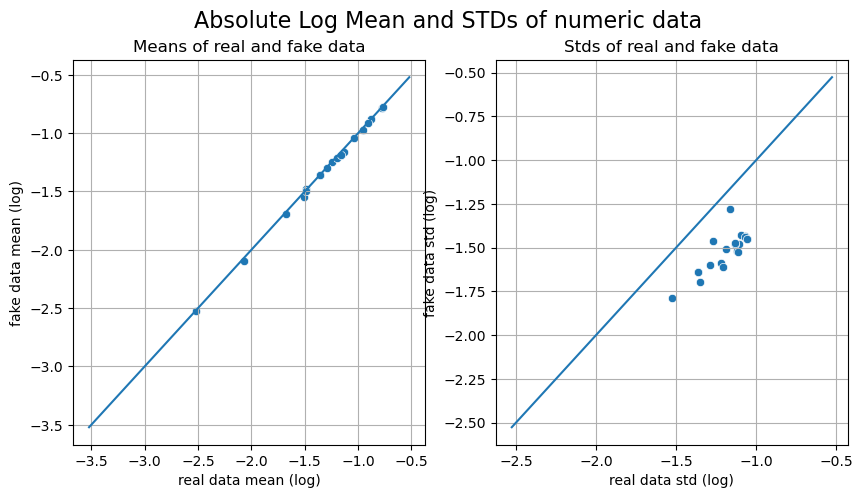

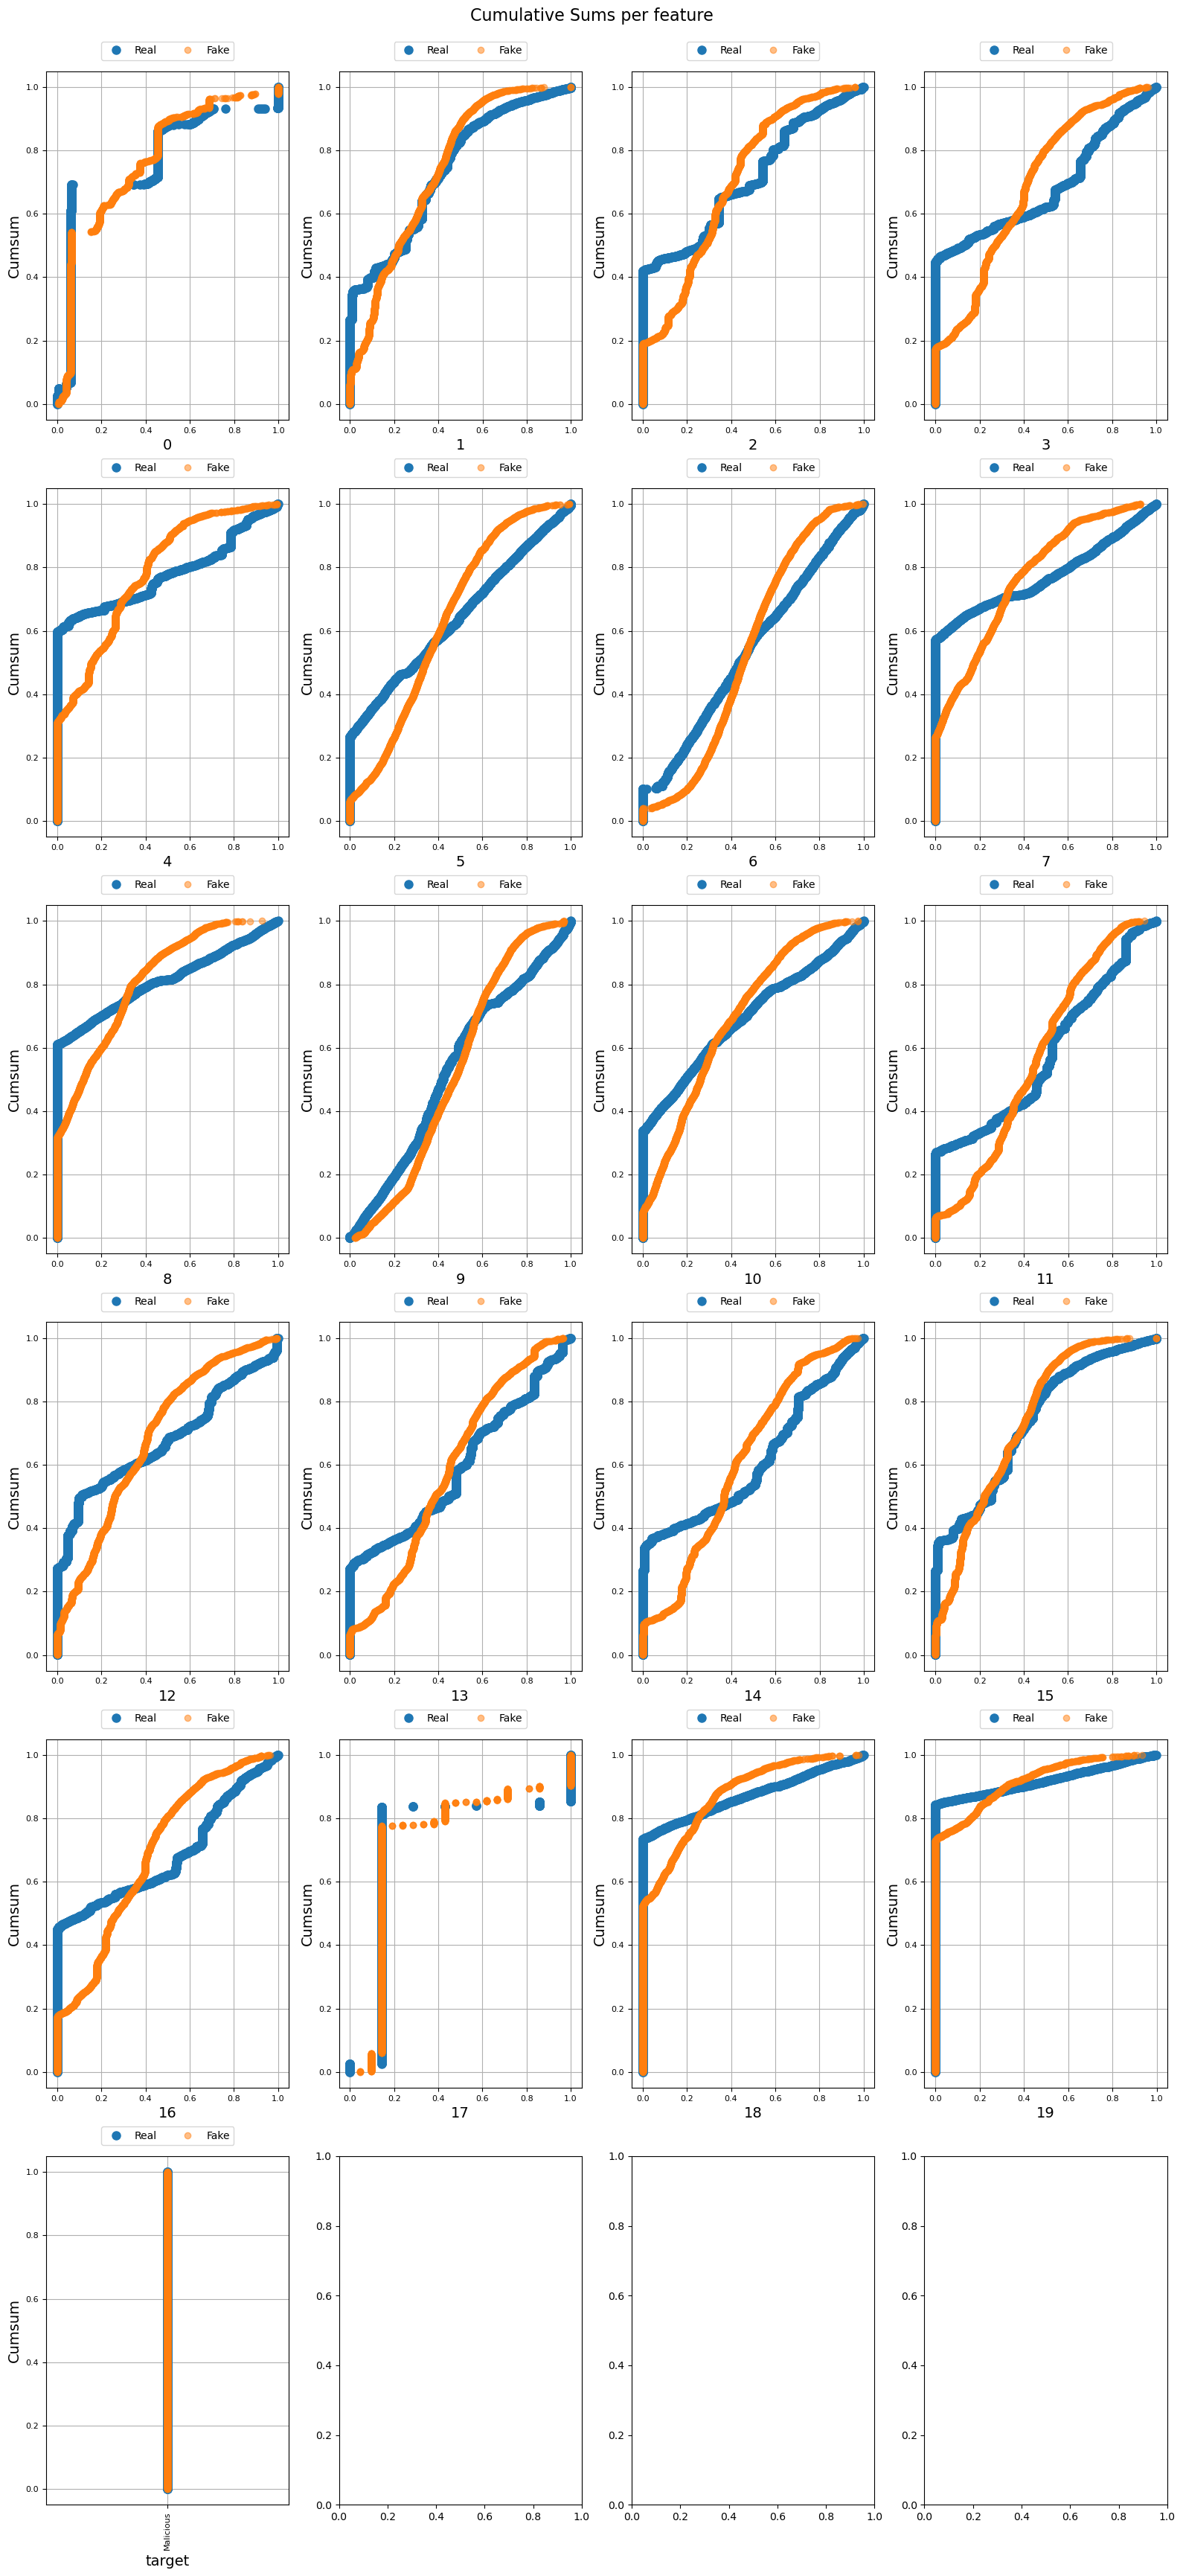

C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

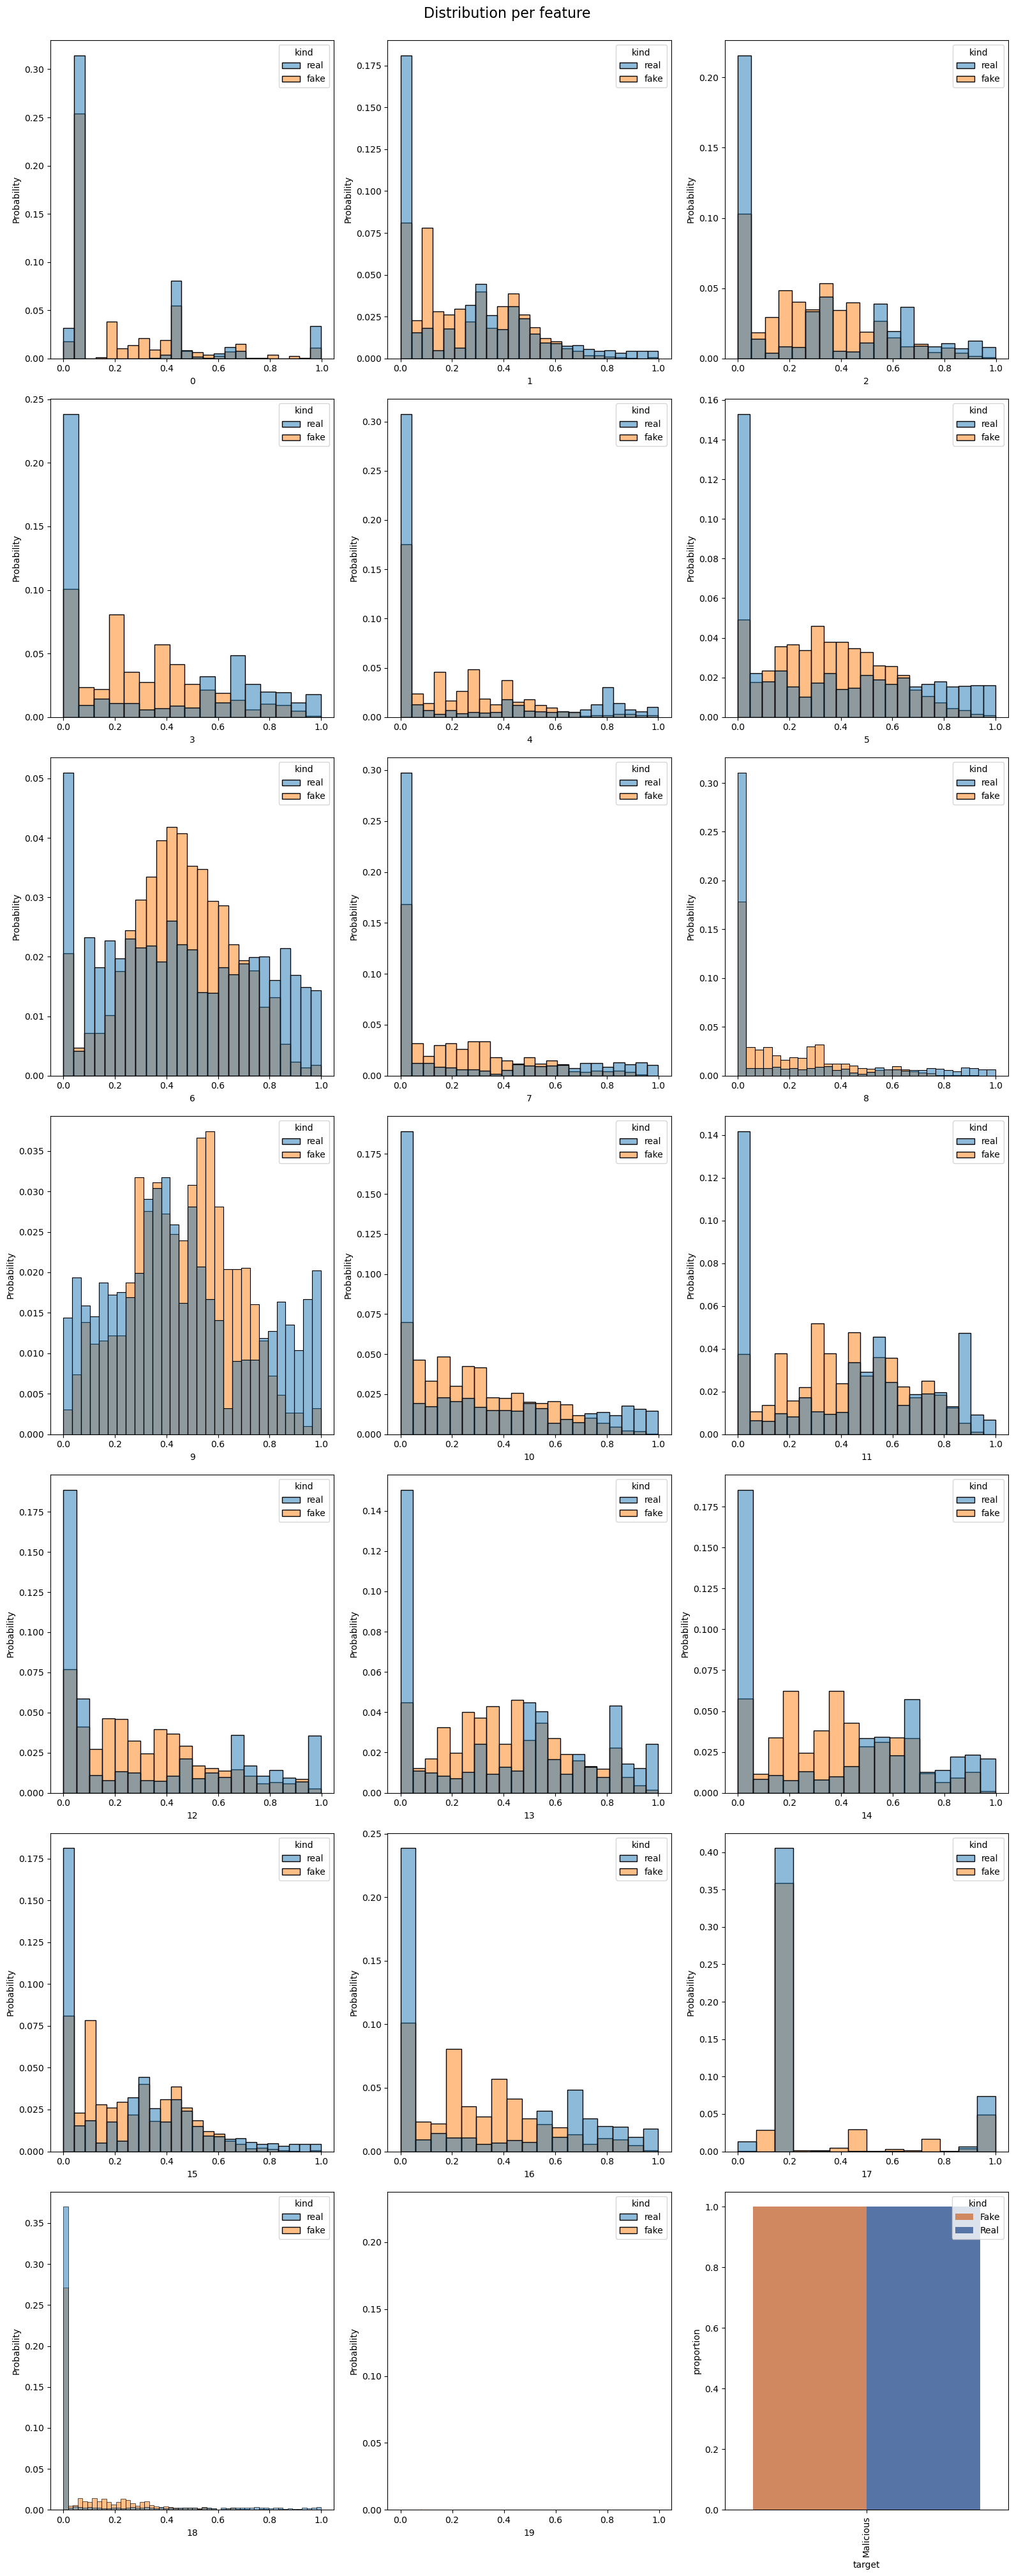

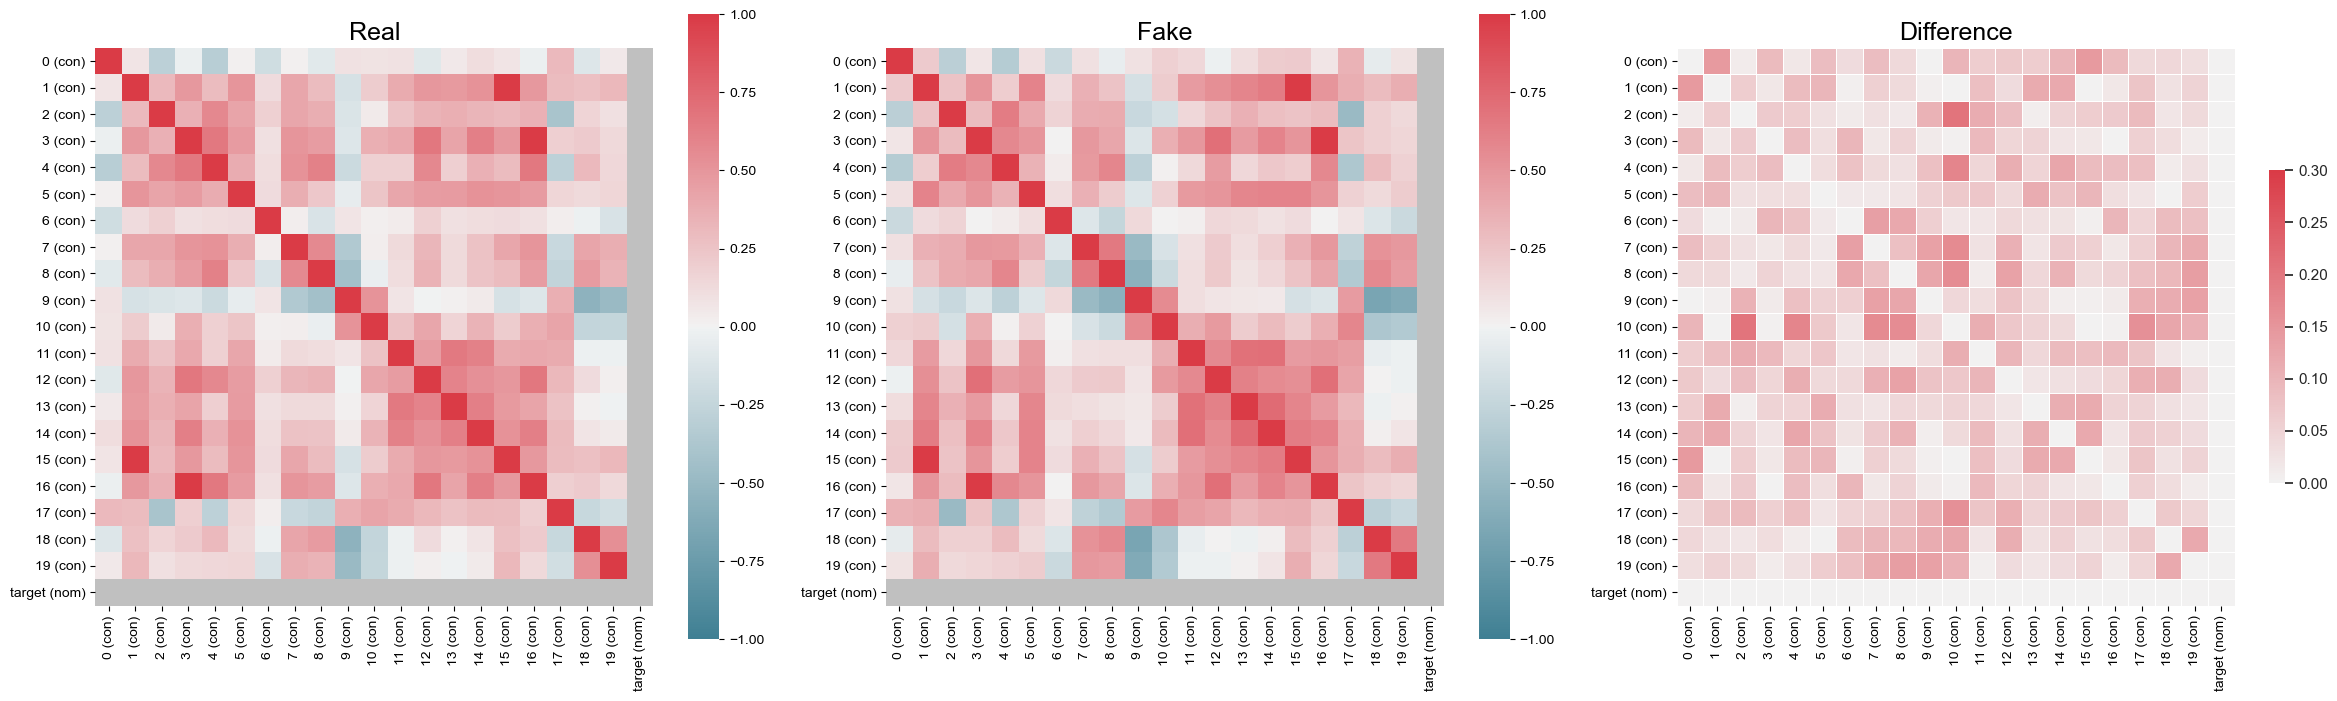

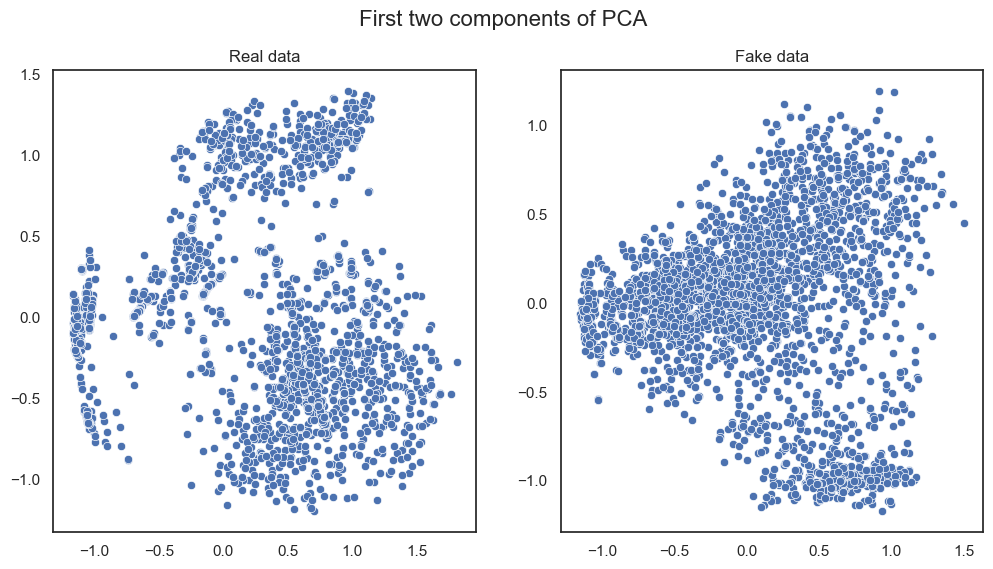

In [48]:
from table_evaluator import load_data, TableEvaluator

Real.columns = Real.columns.astype(str)
Genrated.columns = Genrated.columns.astype(str)
table_evaluator =  TableEvaluator(Real,Genrated)

table_evaluator.visual_evaluation()

In [121]:
dataF=dataF9.append(dataF10,ignore_index = True)

C:\Users\knowl\AppData\Local\Temp\ipykernel_40880\1761473857.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataF=dataF9.append(dataF10,ignore_index = True)


In [122]:
print(Counter(dataF['target']))

Counter({'Malicious': 20000, 'Benign': 20000})


In [123]:
dataF

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.099067,0.326531,0.540621,0.000000,0.0,0.443306,0.686503,0.0,0.0,0.596237,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0,Malicious
1,0.135658,0.326531,0.540621,0.000000,0.0,0.556657,0.607989,0.0,0.0,0.575167,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0,Malicious
2,0.147855,0.326531,0.540621,0.000000,0.0,0.624955,0.506111,0.0,0.0,0.535076,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0,Malicious
3,0.135658,0.326531,0.540621,0.000000,0.0,0.577091,0.452663,0.0,0.0,0.515820,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0,Malicious
4,0.099067,0.326531,0.540621,0.000000,0.0,0.475162,0.526643,0.0,0.0,0.549220,...,0.526250,0.094558,0.833587,0.701473,0.326531,0.000000,0.142857,0.0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.063229,0.000000,0.000000,0.000000,0.0,0.000000,0.619731,0.0,0.0,0.801962,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0,Benign
39996,0.684230,0.000000,0.000000,0.000000,0.0,0.000000,0.274151,0.0,0.0,0.782409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0,Benign
39997,0.452766,0.558795,0.000000,0.850125,0.0,0.558768,0.621289,0.0,0.0,0.589017,...,0.770000,0.994053,0.961363,0.939782,0.558795,0.850125,1.000000,0.0,0.0,Benign
39998,0.452766,0.754130,0.000000,0.153622,0.0,0.342971,0.100213,0.0,0.0,0.992708,...,0.986250,0.588165,0.444782,0.114350,0.754130,0.153622,1.000000,0.0,0.0,Benign


In [124]:
dataF.to_csv("2018balanced.csv")

In [139]:
dataF = dataF.sample(frac=1, random_state=42) 

# Original

In [52]:
X_train, X_test, y_train, y_test = train_test_split(dataFeatures, Target, test_size=0.30, random_state=1, stratify=Target, shuffle=True)
    

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=100, random_state=2,max_depth=10) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
a=accuracy_score(y_test,pred)
print(a)

0.9347826086956522
              precision    recall  f1-score   support

      Benign       0.93      1.00      0.96      6000
   Malicious       0.97      0.52      0.67       900

    accuracy                           0.93      6900
   macro avg       0.95      0.76      0.82      6900
weighted avg       0.94      0.93      0.93      6900

[[5984   16]
 [ 434  466]]
0.9347826086956522


In [55]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=5,learning_rate=0.2)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
a=accuracy_score(y_test,xgb_pred)
print(a)

ADA
              precision    recall  f1-score   support

      Benign       0.89      1.00      0.94      6000
   Malicious       0.91      0.19      0.32       900

    accuracy                           0.89      6900
   macro avg       0.90      0.59      0.63      6900
weighted avg       0.89      0.89      0.86      6900

[[5983   17]
 [ 728  172]]
0.8920289855072464


In [56]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=5, max_depth=10)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))
a=accuracy_score(y_test,b_pred)
print(a)

ETC
              precision    recall  f1-score   support

      Benign       0.88      1.00      0.93      6000
   Malicious       0.89      0.08      0.15       900

    accuracy                           0.88      6900
   macro avg       0.89      0.54      0.54      6900
weighted avg       0.88      0.88      0.83      6900

[[5991    9]
 [ 824   76]]
0.8792753623188406


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='saga',multi_class='multinomial',C=3.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))
a=accuracy_score(y_test,y_pred_class)
print(a)

C:\Users\knowl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

      Benign       0.87      1.00      0.93      6000
   Malicious       0.00      0.00      0.00       900

    accuracy                           0.87      6900
   macro avg       0.43      0.50      0.47      6900
weighted avg       0.76      0.87      0.81      6900

[[5999    1]
 [ 900    0]]
0.8694202898550725


In [60]:
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mealpy.swarm_based.PSO import BasePSO
from mealpy.evolutionary_based.GA import BaseGA
from mealpy.evolutionary_based.DE import BaseDE
from mealpy.swarm_based.MFO import BaseMFO
import numpy as np

sol0E=[]
sol1E=[]
accE=[]
from sklearn.ensemble import ExtraTreesClassifier
def fitness_function(solution):
    print(solution)
    rf_model1 = RandomForestClassifier(n_estimators=int(solution[0]),max_depth=int(solution[1]))
    rf_model2= RandomForestClassifier(n_estimators=int(solution[2]),max_depth=int(solution[3]))
    rf_model3 = RandomForestClassifier(n_estimators=int(solution[4]),max_depth=int(solution[5]))

    # Create the stack ensemble classifier
    ensemble_model = VotingClassifier(estimators=[('rf', rf_model1), ('rf1', rf_model2), ('rf2', rf_model3)], voting='soft')
    #stack_ensemble = StackingClassifier(estimators=[('rf1', rf_model1), ('rf2', rf_model1), ('rf3', rf_model3)], final_estimator=meta_model)
    # Fit the stack ensemble classifier on the training data
    ensemble_model.fit(X_train, y_train)
    pred=ensemble_model.predict(X_test)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    a=accuracy_score(y_test,pred)
    print(a)
    accE.append(a)
    return a


problem = {
    "obj_func": fitness_function,
    "lb": [2, 2,2, 2,2, 2],
    "ub": [300, 200,300,200,300,200],
    "minmax": "max",
    "log_to": None,
    "save_population": False,
}
    


model = BasePSO(problem,epoch=10, pop_size=5, pr=0.03)
#model = BaseGA(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseMFO(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseDE(problem,epoch=10, pop_size=50, pr=0.03)

best_position, best_fitness = model.solve(problem)
print(f"Best solution: {best_position}, Best fitness: {best_fitness}")






[175.01607148 104.07298737   9.36016946  57.72769662 196.19706855
  91.27008514]
0.9320289855072463
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.79      0.65      0.71       900

    accuracy                           0.93      6900
   macro avg       0.87      0.81      0.84      6900
weighted avg       0.93      0.93      0.93      6900

[[5849  151]
 [ 318  582]]
0.9320289855072463
[111.86560466  19.99373094  18.54703212  54.5430656  131.47009318
 174.57158255]
0.936231884057971
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      6000
   Malicious       0.83      0.64      0.72       900

    accuracy                           0.94      6900
   macro avg       0.89      0.81      0.84      6900
weighted avg       0.93      0.94      0.93      6900

[[5881  119]
 [ 321  579]]
0.936231884057971
[ 41.28166286  58.10066966 208.75795196 151.44516351 154

0.9333333333333333
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      6000
   Malicious       0.80      0.65      0.72       900

    accuracy                           0.93      6900
   macro avg       0.87      0.81      0.84      6900
weighted avg       0.93      0.93      0.93      6900

[[5854  146]
 [ 314  586]]
0.9333333333333333
[146.22776543 129.1388081   56.68186202  23.75790271  17.51148059
  52.68998094]
0.9328985507246377
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      6000
   Malicious       0.80      0.65      0.72       900

    accuracy                           0.93      6900
   macro avg       0.87      0.81      0.84      6900
weighted avg       0.93      0.93      0.93      6900

[[5851  149]
 [ 314  586]]
0.9328985507246377
[139.65717135  80.03828673 178.21684546  54.06038316 111.87295178
  83.18939544]
0.931304347826087
              precision    recall  f

0.9346376811594203
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      6000
   Malicious       0.82      0.64      0.72       900

    accuracy                           0.93      6900
   macro avg       0.88      0.81      0.84      6900
weighted avg       0.93      0.93      0.93      6900

[[5871  129]
 [ 322  578]]
0.9346376811594203
[256.88875366  48.97171274  80.92570383 164.33903337 216.95723139
  35.08061157]
0.931304347826087
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.79      0.65      0.71       900

    accuracy                           0.93      6900
   macro avg       0.87      0.81      0.84      6900
weighted avg       0.93      0.93      0.93      6900

[[5842  158]
 [ 316  584]]
0.931304347826087
> Epoch: 6, Current best: 0.9402898550724638, Global best: 0.9402898550724638, Runtime: 78.82003 seconds
[198.09177769 113.63860667  78.9

[[5843  157]
 [ 319  581]]
0.9310144927536231
> Epoch: 9, Current best: 0.9402898550724638, Global best: 0.9402898550724638, Runtime: 69.37222 seconds
[  4.08165892  99.73108529  77.49211675  16.66702727  51.03247401
 179.8573478 ]
0.9363768115942029
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      6000
   Malicious       0.84      0.63      0.72       900

    accuracy                           0.94      6900
   macro avg       0.89      0.81      0.84      6900
weighted avg       0.93      0.94      0.93      6900

[[5891  109]
 [ 330  570]]
0.9363768115942029
[ 34.14442849  43.36860614  31.00958458  97.3509787  277.91602824
  37.34504689]
0.932463768115942
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.79      0.65      0.72       900

    accuracy                           0.93      6900
   macro avg       0.87      0.81      0.84      6900
weigh

# Proposed

dataF.to_csv('ProposedUpsamplingData1.csv')

dataF1=pd.read_csv('SDNProposedUpsamplingData1.csv')

dataF=dataF.drop('Unnamed: 0',axis=1)

In [140]:
target1=dataF['target']
feature1=dataF.drop('target',axis=1)

In [141]:
Counter(target1)

Counter({'Benign': 20000, 'Malicious': 20000})

In [127]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target1, test_size=0.30, random_state=1, stratify=target1, shuffle=True)
    

In [128]:
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


sol0E=[]
sol1E=[]
accE=[]
from sklearn.ensemble import ExtraTreesClassifier
def fitness_function(solution):
    print(solution)
    rf_model1 = RandomForestClassifier(n_estimators=int(solution[0]),max_depth=int(solution[1]))
    rf_model2= RandomForestClassifier(n_estimators=int(solution[2]),max_depth=int(solution[3]))
    rf_model3 = RandomForestClassifier(n_estimators=int(solution[4]),max_depth=int(solution[5]))

    # Create the stack ensemble classifier
    ensemble_model = VotingClassifier(estimators=[('rf', rf_model1), ('rf1', rf_model2), ('rf2', rf_model3)], voting='soft')
    #stack_ensemble = StackingClassifier(estimators=[('rf1', rf_model1), ('rf2', rf_model1), ('rf3', rf_model3)], final_estimator=meta_model)
    # Fit the stack ensemble classifier on the training data
    ensemble_model.fit(X_train, y_train)
    pred=ensemble_model.predict(X_test)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    a=accuracy_score(y_test,pred)
    print(a)
    accE.append(a)
    return a


problem = {
    "obj_func": fitness_function,
    "lb": [2, 2,2, 2,2, 2],
    "ub": [300, 200,300,200,300,200],
    "minmax": "max",
    "log_to": None,
    "save_population": False,
}
    


model = BasePSO(problem,epoch=10, pop_size=5, pr=0.03)
#model = BaseGA(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseMFO(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseDE(problem,epoch=10, pop_size=50, pr=0.03)

best_position, best_fitness = model.solve(problem)
print(f"Best solution: {best_position}, Best fitness: {best_fitness}")






[ 38.7781877  190.41714904 263.49264311 170.61111102 128.99191776
  44.69793009]
0.9604166666666667
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.97      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5824  176]
 [ 299 5701]]
0.9604166666666667
[ 66.64583137  74.94102793 241.57014872  17.08724405 149.32223068
 122.81022243]
0.9613333333333334
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.97      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5850  150]
 [ 314 5686]]
0.9613333333333334
[ 52.37007378  67.68212968 145.7990925   16.50131621 1

0.96075
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.97      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5829  171]
 [ 300 5700]]
0.96075
[179.13558829  19.99335427 206.46606448 138.76715721   4.32148211
  83.91803492]
0.9604166666666667
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.97      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5837  163]
 [ 312 5688]]
0.9604166666666667
[272.6583691  123.71328163 192.62731349  75.47412962 209.86456342
  70.26255856]
0.9604166666666667
              precision    recall  f1-score   support

  

0.9621666666666666
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      6000
   Malicious       0.98      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5860  140]
 [ 314 5686]]
0.9621666666666666
[139.27896686  14.26609686 183.46126769  36.80398371  50.00166687
 108.76483385]
0.9625
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      6000
   Malicious       0.98      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5870  130]
 [ 320 5680]]
0.9625
> Epoch: 6, Current best: 0.9638333333333333, Global best: 0.9638333333333333, Runtime: 175.00328 seconds
[105.25862791  75.83976398 164.48442509  16.88699065 

0.9601666666666666
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.97      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5826  174]
 [ 304 5696]]
0.9601666666666666
[251.32907677  60.44100766 187.9571294   19.48737424 154.72060305
 109.01121816]
0.9615833333333333
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      6000
   Malicious       0.97      0.95      0.96      6000

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[5850  150]
 [ 311 5689]]
0.9615833333333333
[207.25228314 114.79426617 181.87381982  10.7205146  164.64727263
  93.65885301]
0.9636666666666667
              precision    recall  

In [61]:
array5=[[5853,  147],
 [ 320 , 580]]
Imb =pd.DataFrame(array5, index = [i for i in "01"],
                  columns = [i for i in "01"])

array4=[[5666 , 334],
 [ 429, 5709]]
ADSYN=pd.DataFrame(array4, index = [i for i in "01"],
                  columns = [i for i in "01"])

array3=[[5674 , 326],
 [ 444, 5556]]
SMOTE=pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

array2=[[5919,   81],
 [ 347, 5653]]
SDATE = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])

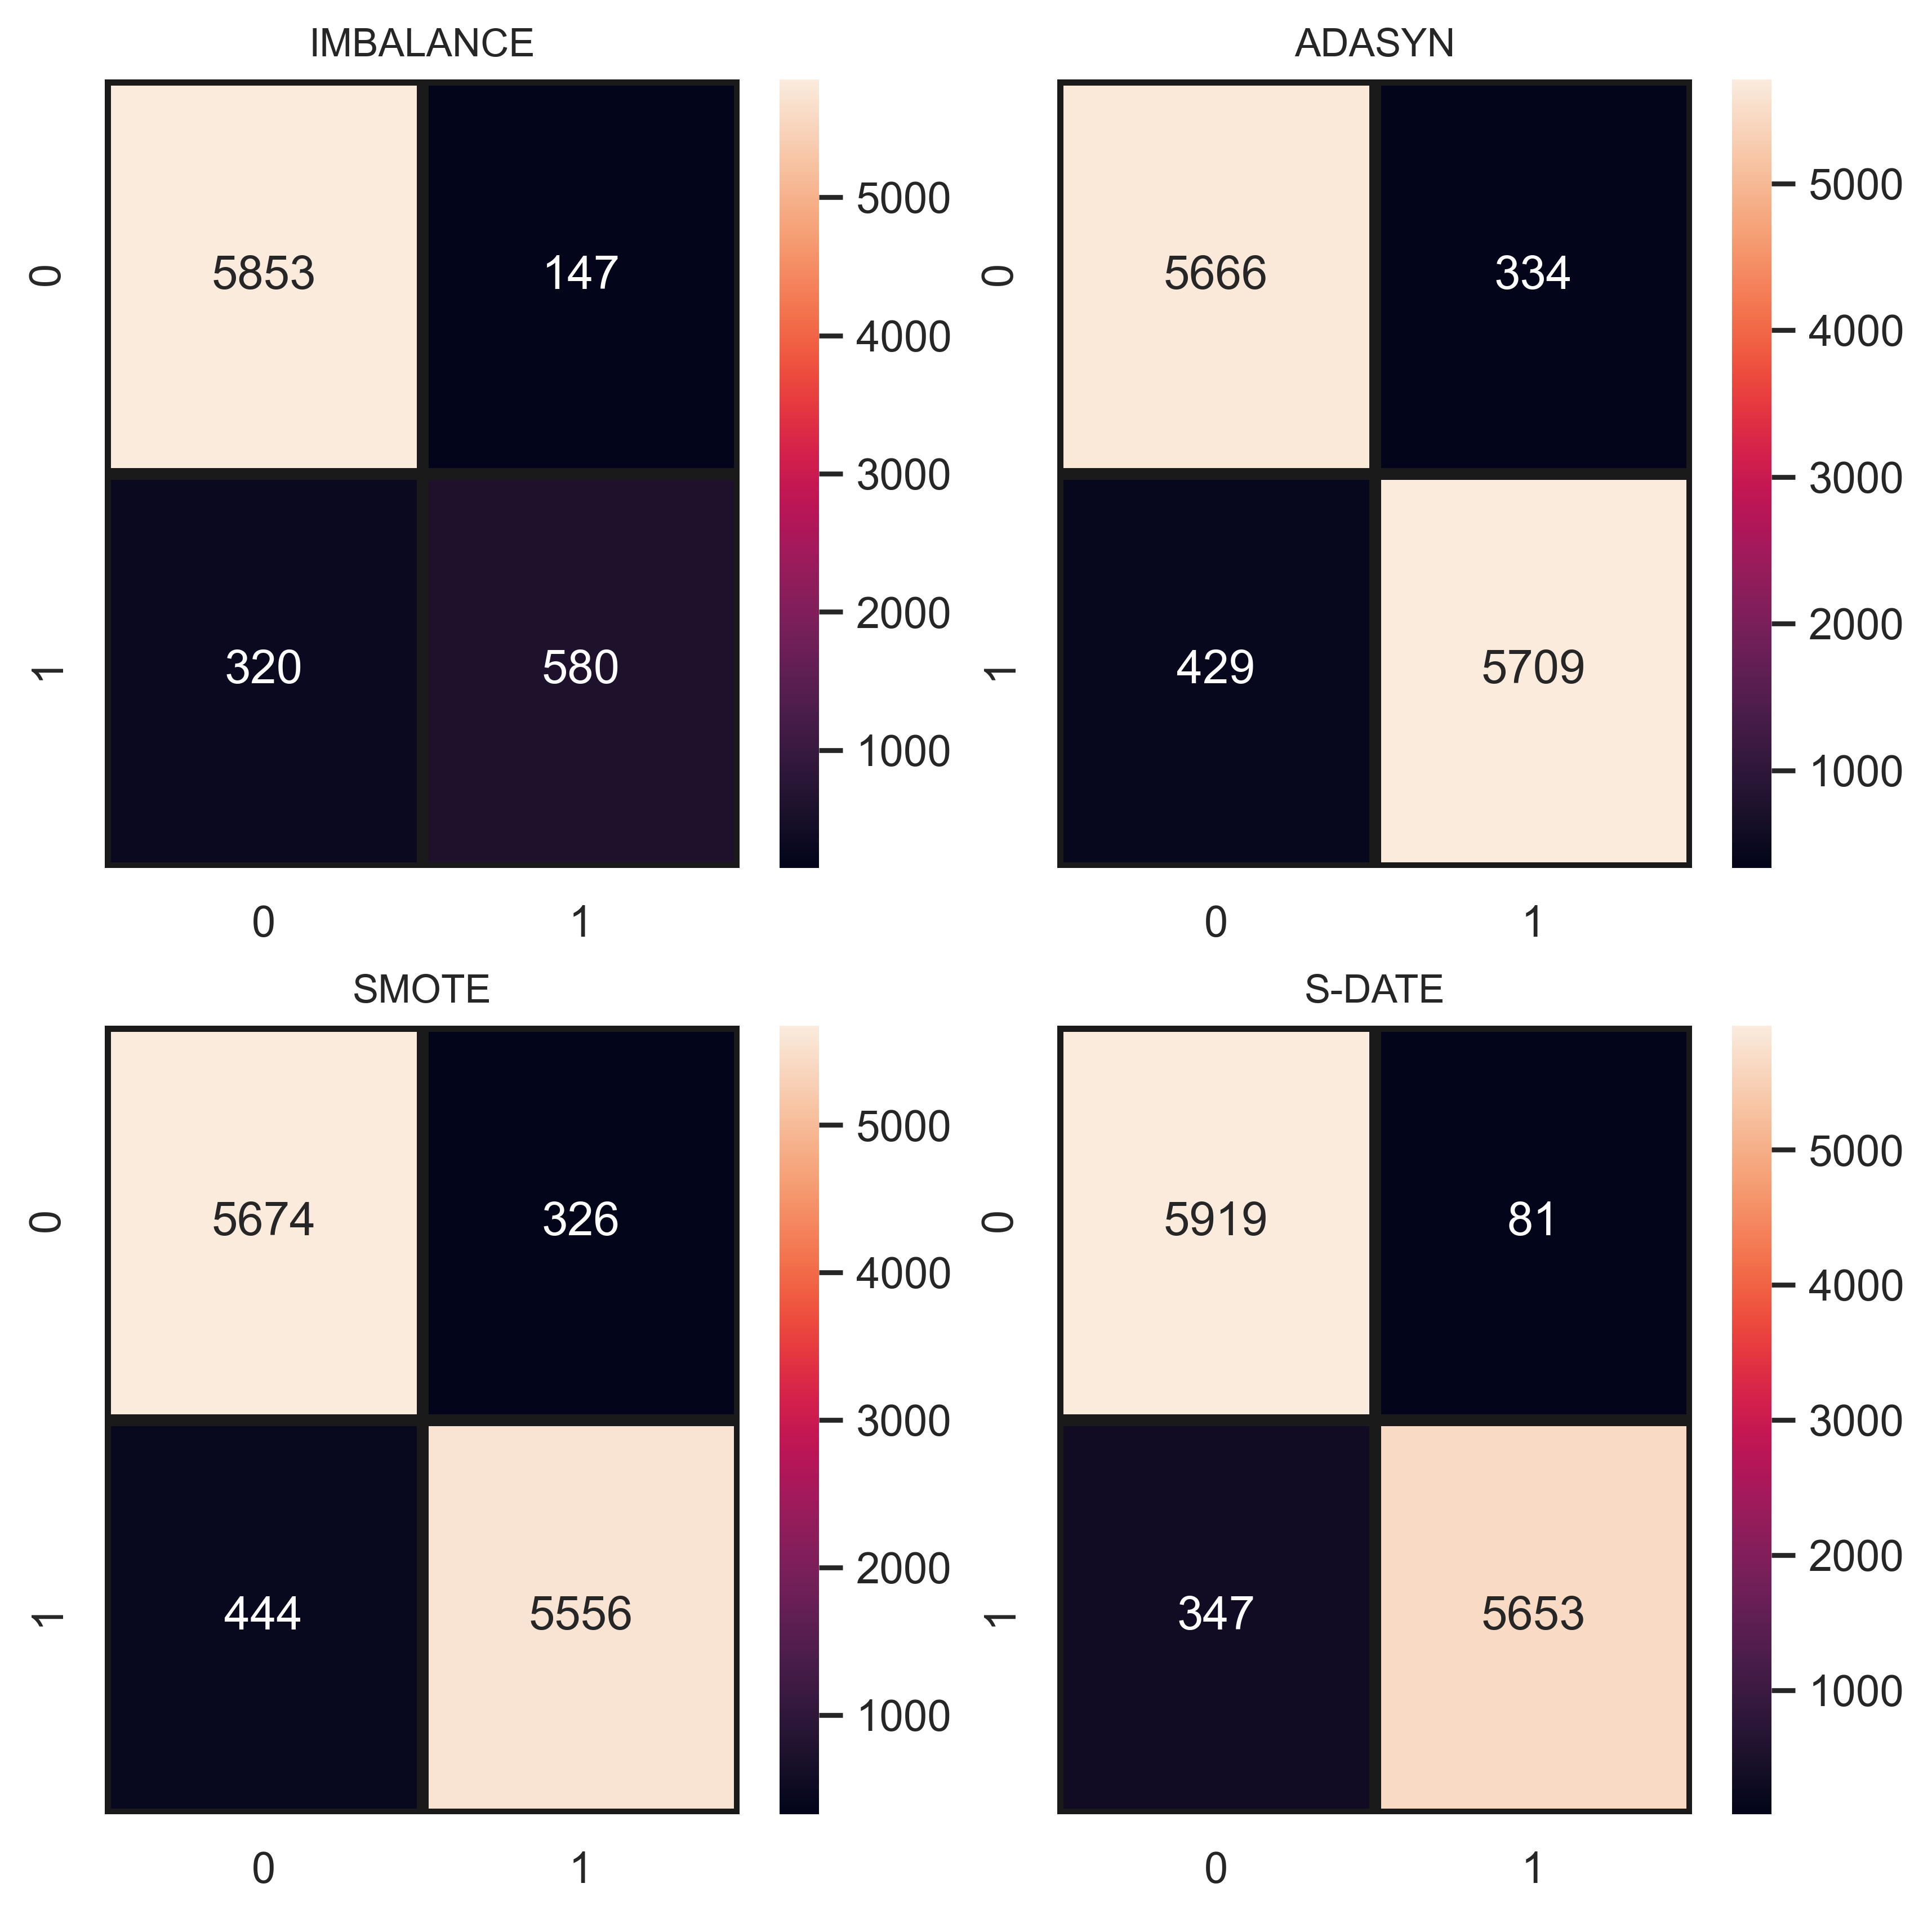

In [65]:
i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A,fontsize=10)

plt.figure(1,figsize=(8, 8),dpi=500)
plt.subplot(221) 
plot_sub_sentiment(Imb,'IMBALANCE')
plt.subplot(222)
plot_sub_sentiment(ADSYN,'ADASYN')
plt.subplot(223)
plot_sub_sentiment(SMOTE,'SMOTE')
plt.subplot(224)
plot_sub_sentiment(SDATE,'S-DATE')

plt.savefig('conf2018.pdf')
plt.show()


In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=100, random_state=2,max_depth=10) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
a=accuracy_score(y_test,pred)
print(a)

0.9520833333333333
              precision    recall  f1-score   support

      Benign       0.93      0.98      0.95      6000
   Malicious       0.98      0.92      0.95      6000

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000

[[5899  101]
 [ 474 5526]]
0.9520833333333333


In [137]:
Counter(target1)

Counter({'Malicious': 20000, 'Benign': 20000})

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
a =  RandomForestClassifier(n_estimators=100, random_state=2,max_depth=10) 
# Perform cross-validation
results = cross_val_score(a, feature1, target1, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())


Cross-validation Results:  [0.9595   0.959625 0.961125 0.957625 0.96025 ]
Mean Accuracy:  0.9596250000000002
Standard Deviation:  0.0011537980759214572


In [131]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=5,learning_rate=0.2)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
a=accuracy_score(y_test,xgb_pred)
print(a)

ADA
              precision    recall  f1-score   support

      Benign       0.86      0.91      0.89      6000
   Malicious       0.91      0.85      0.88      6000

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

[[5481  519]
 [ 895 5105]]
0.8821666666666667


In [143]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
xgb = AdaBoostClassifier(n_estimators=100, random_state=5,learning_rate=0.2)
# Perform cross-validation
results = cross_val_score(xgb, feature1, target1, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())


Cross-validation Results:  [0.883    0.887    0.877875 0.879375 0.8815  ]
Mean Accuracy:  0.8817499999999999
Standard Deviation:  0.003157332735078784


In [133]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=5, max_depth=10)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))
a=accuracy_score(y_test,b_pred)
print(a)

ETC
              precision    recall  f1-score   support

      Benign       0.87      0.97      0.92      6000
   Malicious       0.97      0.86      0.91      6000

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.91     12000
weighted avg       0.92      0.92      0.91     12000

[[5828  172]
 [ 845 5155]]
0.91525


In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
b = ExtraTreesClassifier(n_estimators=100, random_state=5, max_depth=20)
# Perform cross-validation
results = cross_val_score(b, feature1, target1, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())


Cross-validation Results:  [0.949125 0.950375 0.949625 0.943375 0.947625]
Mean Accuracy:  0.948025
Standard Deviation:  0.0024929901724635947


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))
a=accuracy_score(y_test,y_pred_class)
print(a)

              precision    recall  f1-score   support

      Benign       0.71      0.58      0.64      6000
   Malicious       0.65      0.77      0.70      6000

    accuracy                           0.67     12000
   macro avg       0.68      0.67      0.67     12000
weighted avg       0.68      0.67      0.67     12000

[[3485 2515]
 [1402 4598]]
0.6735833333333333


In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0) 
# Perform cross-validation
results = cross_val_score(logreg, feature1, target1, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())


Cross-validation Results:  [0.675875 0.68125  0.67125  0.678875 0.67075 ]
Mean Accuracy:  0.6756
Standard Deviation:  0.004127196384956756


# SMOTE

In [49]:
target=Data25['target']
feature=Data25.drop('target',axis=1)

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(feature, target)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1, stratify=y_res, shuffle=True)


In [55]:
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mealpy.swarm_based.PSO import BasePSO
from mealpy.evolutionary_based.GA import BaseGA
from mealpy.evolutionary_based.DE import BaseDE
from mealpy.swarm_based.MFO import BaseMFO
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


sol0E=[]
sol1E=[]
accE=[]
from sklearn.ensemble import ExtraTreesClassifier
def fitness_function(solution):
    print(solution)
    rf_model1 = RandomForestClassifier(n_estimators=int(solution[0]),max_depth=int(solution[1]))
    rf_model2= RandomForestClassifier(n_estimators=int(solution[2]),max_depth=int(solution[3]))
    rf_model3 = RandomForestClassifier(n_estimators=int(solution[4]),max_depth=int(solution[5]))

    # Create the stack ensemble classifier
    ensemble_model = VotingClassifier(estimators=[('rf', rf_model1), ('rf1', rf_model2), ('rf2', rf_model3)], voting='soft')
    #stack_ensemble = StackingClassifier(estimators=[('rf1', rf_model1), ('rf2', rf_model1), ('rf3', rf_model3)], final_estimator=meta_model)
    # Fit the stack ensemble classifier on the training data
    ensemble_model.fit(X_train, y_train)
    pred=ensemble_model.predict(X_test)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    a=accuracy_score(y_test,pred)
    print(a)
    accE.append(a)
    return a


problem = {
    "obj_func": fitness_function,
    "lb": [2, 2,2, 2,2, 2],
    "ub": [300, 200,300,200,300,200],
    "minmax": "max",
    "log_to": None,
    "save_population": False,
}
    


model = BasePSO(problem,epoch=10, pop_size=5, pr=0.03)
#model = BaseGA(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseMFO(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseDE(problem,epoch=10, pop_size=50, pr=0.03)

best_position, best_fitness = model.solve(problem)
print(f"Best solution: {best_position}, Best fitness: {best_fitness}")






[135.06152822 182.15491524 240.78845118  54.79670441 137.09588747
  73.11154234]
0.9360833333333334
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      6000
   Malicious       0.95      0.93      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

[[5677  323]
 [ 444 5556]]
0.9360833333333334
[115.13921869  39.8281602  122.80562625  42.04940069 114.24162631
  97.50360788]
0.93575
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      6000
   Malicious       0.94      0.93      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

[[5672  328]
 [ 443 5557]]
0.93575
[251.7533792   45.61015814  60.34844748  91.69855392  90.94043285
  79.28948

0.9368333333333333
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      6000
   Malicious       0.95      0.93      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

[[5679  321]
 [ 437 5563]]
0.9368333333333333
[264.74318842  64.24554289 160.22358858 166.42762547 163.45900942
  78.52629672]
0.93575
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      6000
   Malicious       0.94      0.93      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

[[5674  326]
 [ 445 5555]]
0.93575
[231.58548143 165.35398309 170.6323818  148.76393426 118.70967186
 184.54953811]
0.9356666666666666
              precision    recall  f1-score   support

  

0.937
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      6000
   Malicious       0.95      0.93      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

[[5677  323]
 [ 433 5567]]
0.937
> Epoch: 6, Current best: 0.937, Global best: 0.937, Runtime: 79.71715 seconds
[ 53.57147086  76.30398494 110.7996828  139.47804218 125.6176668
  69.88248078]
0.9355
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      6000
   Malicious       0.94      0.93      0.93      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

[[5673  327]
 [ 447 5553]]
0.9355
[ 57.9546155  167.38406648  72.91822711  84.57484016 199.9938549
 174.62376261]
0.9355833333333333
        

KeyboardInterrupt: 

In [150]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=100, random_state=2,max_depth=10) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
a=accuracy_score(y_test,pred)
print(a)

0.8825
              precision    recall  f1-score   support

      Benign       0.83      0.96      0.89      6000
   Malicious       0.95      0.81      0.87      6000

    accuracy                           0.88     12000
   macro avg       0.89      0.88      0.88     12000
weighted avg       0.89      0.88      0.88     12000

[[5747  253]
 [1157 4843]]
0.8825


In [151]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
a =  RandomForestClassifier(n_estimators=100, random_state=2,max_depth=10) 
# Perform cross-validation
results = cross_val_score(a, X_res, y_res, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())


Cross-validation Results:  [0.828125 0.88625  0.8485   0.9035   0.43475 ]
Mean Accuracy:  0.7802250000000001
Standard Deviation:  0.17478380216713446


In [152]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=5,learning_rate=0.2)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
a=accuracy_score(y_test,xgb_pred)
print(a)

ADA
              precision    recall  f1-score   support

      Benign       0.73      0.88      0.80      6000
   Malicious       0.85      0.68      0.76      6000

    accuracy                           0.78     12000
   macro avg       0.79      0.78      0.78     12000
weighted avg       0.79      0.78      0.78     12000

[[5256  744]
 [1906 4094]]
0.7791666666666667


In [153]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
xgb = AdaBoostClassifier(n_estimators=100, random_state=5,learning_rate=0.2)
# Perform cross-validation
results = cross_val_score(xgb, X_res, y_res, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())

Cross-validation Results:  [0.706375 0.785375 0.772875 0.829125 0.3845  ]
Mean Accuracy:  0.69565
Standard Deviation:  0.1604737984843632


In [154]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=5, max_depth=10)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))
a=accuracy_score(y_test,b_pred)
print(a)

ETC
              precision    recall  f1-score   support

      Benign       0.79      0.72      0.76      6000
   Malicious       0.75      0.81      0.78      6000

    accuracy                           0.77     12000
   macro avg       0.77      0.77      0.77     12000
weighted avg       0.77      0.77      0.77     12000

[[4348 1652]
 [1141 4859]]
0.76725


In [155]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
b = ExtraTreesClassifier(n_estimators=100, random_state=5, max_depth=10)
# Perform cross-validation
results = cross_val_score(b, X_res, y_res, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())

Cross-validation Results:  [0.581875 0.585875 0.736125 0.899125 0.512625]
Mean Accuracy:  0.663125
Standard Deviation:  0.13874031497729847


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))
a=accuracy_score(y_test,y_pred_class)
print(a)

              precision    recall  f1-score   support

      Benign       0.65      0.53      0.59      6000
   Malicious       0.60      0.71      0.65      6000

    accuracy                           0.62     12000
   macro avg       0.63      0.62      0.62     12000
weighted avg       0.63      0.62      0.62     12000

[[3198 2802]
 [1719 4281]]
0.62325


In [157]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
# Perform cross-validation
results = cross_val_score(logreg, X_res, y_res, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())

Cross-validation Results:  [0.4515   0.4855   0.600875 0.763125 0.765125]
Mean Accuracy:  0.6132250000000001
Standard Deviation:  0.13278915147706913


# Adasyn

In [56]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resA, y_resY = ada.fit_resample(feature, target)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resA, y_resY, test_size=0.30, random_state=1, stratify=y_resY, shuffle=True)


In [58]:
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mealpy.swarm_based.PSO import BasePSO
from mealpy.evolutionary_based.GA import BaseGA
from mealpy.evolutionary_based.DE import BaseDE
from mealpy.swarm_based.MFO import BaseMFO
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


sol0E=[]
sol1E=[]
accE=[]
from sklearn.ensemble import ExtraTreesClassifier
def fitness_function(solution):
    print(solution)
    rf_model1 = RandomForestClassifier(n_estimators=int(solution[0]),max_depth=int(solution[1]))
    rf_model2= RandomForestClassifier(n_estimators=int(solution[2]),max_depth=int(solution[3]))
    rf_model3 = RandomForestClassifier(n_estimators=int(solution[4]),max_depth=int(solution[5]))

    # Create the stack ensemble classifier
    ensemble_model = VotingClassifier(estimators=[('rf', rf_model1), ('rf1', rf_model2), ('rf2', rf_model3)], voting='soft')
    #stack_ensemble = StackingClassifier(estimators=[('rf1', rf_model1), ('rf2', rf_model1), ('rf3', rf_model3)], final_estimator=meta_model)
    # Fit the stack ensemble classifier on the training data
    ensemble_model.fit(X_train, y_train)
    pred=ensemble_model.predict(X_test)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    a=accuracy_score(y_test,pred)
    print(a)
    accE.append(a)
    return a


problem = {
    "obj_func": fitness_function,
    "lb": [2, 2,2, 2,2, 2],
    "ub": [300, 200,300,200,300,200],
    "minmax": "max",
    "log_to": None,
    "save_population": False,
}
    


model = BasePSO(problem,epoch=10, pop_size=5, pr=0.03)
#model = BaseGA(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseMFO(problem,epoch=10, pop_size=50, pr=0.03)
#model = BaseDE(problem,epoch=10, pop_size=50, pr=0.03)

best_position, best_fitness = model.solve(problem)
print(f"Best solution: {best_position}, Best fitness: {best_fitness}")






[138.04454506 155.99736153 183.08851932  99.54462899  88.06339968
  73.65683537]
0.9369747899159664
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94      6000
   Malicious       0.94      0.93      0.94      6138

    accuracy                           0.94     12138
   macro avg       0.94      0.94      0.94     12138
weighted avg       0.94      0.94      0.94     12138

[[5657  343]
 [ 422 5716]]
0.9369747899159664
[121.17077549  21.46982744  19.52346293 101.34890504  37.55951574
 155.73533338]
0.9374691052891745
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94      6000
   Malicious       0.95      0.93      0.94      6138

    accuracy                           0.94     12138
   macro avg       0.94      0.94      0.94     12138
weighted avg       0.94      0.94      0.94     12138

[[5669  331]
 [ 428 5710]]
0.9374691052891745
[186.8262044   21.32261745  49.89920934 198.70088923 1

0.9372219476025705
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94      6000
   Malicious       0.94      0.93      0.94      6138

    accuracy                           0.94     12138
   macro avg       0.94      0.94      0.94     12138
weighted avg       0.94      0.94      0.94     12138

[[5663  337]
 [ 425 5713]]
0.9372219476025705
[147.30141565 179.49363652  55.39835047   8.88489321 197.9694692
 176.96938382]
0.9326083374526281
              precision    recall  f1-score   support

      Benign       0.92      0.95      0.93      6000
   Malicious       0.95      0.92      0.93      6138

    accuracy                           0.93     12138
   macro avg       0.93      0.93      0.93     12138
weighted avg       0.93      0.93      0.93     12138

[[5691  309]
 [ 509 5629]]
0.9326083374526281
[239.80477238 156.02572479  84.98821988  78.52970538  42.8864328
 132.67105611]
0.9368100181248971
              precision    recall  f1

0.9371395617070357
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94      6000
   Malicious       0.94      0.93      0.94      6138

    accuracy                           0.94     12138
   macro avg       0.94      0.94      0.94     12138
weighted avg       0.94      0.94      0.94     12138

[[5660  340]
 [ 423 5715]]
0.9371395617070357
[123.99539372 150.01090628  76.37120678  13.35747702  42.05522711
  56.93283019]
0.935244686109738
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      6000
   Malicious       0.95      0.93      0.94      6138

    accuracy                           0.94     12138
   macro avg       0.94      0.94      0.94     12138
weighted avg       0.94      0.94      0.94     12138

[[5672  328]
 [ 458 5680]]
0.935244686109738
> Epoch: 6, Current best: 0.9380458065579172, Global best: 0.9380458065579172, Runtime: 102.58487 seconds
[176.19887909 177.83389187  40.

0.9373043334981052
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94      6000
   Malicious       0.94      0.93      0.94      6138

    accuracy                           0.94     12138
   macro avg       0.94      0.94      0.94     12138
weighted avg       0.94      0.94      0.94     12138

[[5658  342]
 [ 419 5719]]
0.9373043334981052
[155.9448046  137.12909523  35.0264975   26.62936867 117.707114
  33.98525964]
0.9366452463338276
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94      6000
   Malicious       0.94      0.93      0.94      6138

    accuracy                           0.94     12138
   macro avg       0.94      0.94      0.94     12138
weighted avg       0.94      0.94      0.94     12138

[[5653  347]
 [ 422 5716]]
0.9366452463338276
[122.88020114 181.33747313 162.06040977  19.94393417  48.69682795
 180.62139264]
0.9369747899159664
              precision    recall  f1

In [160]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=100, random_state=2,max_depth=10) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
a=accuracy_score(y_test,pred)
print(a)

0.8732904926676553
              precision    recall  f1-score   support

      Benign       0.82      0.95      0.88      6000
   Malicious       0.95      0.79      0.86      6138

    accuracy                           0.87     12138
   macro avg       0.88      0.87      0.87     12138
weighted avg       0.88      0.87      0.87     12138

[[5730  270]
 [1268 4870]]
0.8732904926676553


In [161]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
a =  RandomForestClassifier(n_estimators=100, random_state=2,max_depth=10) 
# Perform cross-validation
results = cross_val_score(a, X_resA, y_resY, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())

Cross-validation Results:  [0.83625803 0.95205141 0.87827484 0.77001977 0.26869361]
Mean Accuracy:  0.7410595327140431
Standard Deviation:  0.24346524466386402


In [162]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=100, random_state=5,learning_rate=0.2)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
a=accuracy_score(y_test,xgb_pred)
print(a)

ADA
              precision    recall  f1-score   support

      Benign       0.73      0.86      0.79      6000
   Malicious       0.83      0.68      0.75      6138

    accuracy                           0.77     12138
   macro avg       0.78      0.77      0.77     12138
weighted avg       0.78      0.77      0.77     12138

[[5163  837]
 [1953 4185]]
0.7701433514582303


In [163]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
xgb = AdaBoostClassifier(n_estimators=100, random_state=5,learning_rate=0.2)
# Perform cross-validation
results = cross_val_score(xgb, X_resA, y_resY, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())

Cross-validation Results:  [0.74752842 0.91448344 0.85306476 0.73776569 0.19775059]
Mean Accuracy:  0.6901185800936005
Standard Deviation:  0.2549052469908863


In [164]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=100, random_state=5, max_depth=10)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))
a=accuracy_score(y_test,b_pred)
print(a)

ETC
              precision    recall  f1-score   support

      Benign       0.77      0.76      0.77      6000
   Malicious       0.77      0.77      0.77      6138

    accuracy                           0.77     12138
   macro avg       0.77      0.77      0.77     12138
weighted avg       0.77      0.77      0.77     12138

[[4581 1419]
 [1387 4751]]
0.7688251771296754


In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
b = ExtraTreesClassifier(n_estimators=100, random_state=5, max_depth=10)
# Perform cross-validation
results = cross_val_score(b, X_resA, y_resY, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())

Cross-validation Results:  [0.59453782 0.69414236 0.77644587 0.72392486 0.30947967]
Mean Accuracy:  0.6197061166502413
Standard Deviation:  0.1660382759956709


In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))
a=accuracy_score(y_test,y_pred_class)
print(a)

              precision    recall  f1-score   support

      Benign       0.62      0.52      0.57      6000
   Malicious       0.60      0.69      0.64      6138

    accuracy                           0.61     12138
   macro avg       0.61      0.61      0.60     12138
weighted avg       0.61      0.61      0.60     12138

[[3111 2889]
 [1884 4254]]
0.606772120612951


In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
# Perform cross-validation
results = cross_val_score(logreg, X_resA, y_resY, cv=5)

# Print the results
print("Cross-validation Results: ", results)
print("Mean Accuracy: ", results.mean())
print("Standard Deviation: ", results.std())

Cross-validation Results:  [0.47305981 0.5554869  0.59688581 0.72083539 0.59424051]
Mean Accuracy:  0.588101686616761
Standard Deviation:  0.08003929038937672


In [66]:
from scipy import stats

# Define the data for each model
rf_imbalanced = [0.93, 0.95, 0.76, 0.82]
ada_imbalanced = [0.89, 0.90, 0.59, 0.63]
etc_imbalanced = [0.88, 0.89, 0.54, 0.54]
lr_imbalanced = [0.87, 0.43, 0.50, 0.47]
pso_d_sem_imbalanced = [0.94, 0.94, 0.79, 0.84]

rf_smote = [0.88, 0.88, 0.88, 0.88]
ada_smote = [0.78, 0.79, 0.78, 0.78]
etc_smote = [0.77, 0.77, 0.77, 0.77]
lr_smote = [0.62, 0.63, 0.62, 0.62]
pso_d_sem_smote = [0.94, 0.94, 0.94, 0.94]

rf_adasyn = [0.87, 0.88, 0.87, 0.87]
ada_adasyn = [0.77, 0.78, 0.77, 0.77]
etc_adasyn = [0.77, 0.77, 0.77, 0.77]
lr_adasyn = [0.61, 0.61, 0.61, 0.60]
pso_d_sem_adasyn = [0.94, 0.94, 0.94, 0.94]

rf_s_date = [0.95, 0.95, 0.95, 0.95]
ada_s_date = [0.88, 0.88, 0.88, 0.88]
etc_s_date = [0.92, 0.92, 0.92, 0.91]
lr_s_date = [0.67, 0.68, 0.67, 0.67]
pso_d_sem_s_date = [0.96, 0.97, 0.96, 0.96]

# Perform the pairwise T-tests
results = {
    "Imbalanced vs SMOTE": stats.ttest_rel(rf_imbalanced, rf_smote),
    "Imbalanced vs ADASYN": stats.ttest_rel(rf_imbalanced, rf_adasyn),
    "Imbalanced vs S-DATE": stats.ttest_rel(rf_imbalanced, rf_s_date),
    # Add more comparisons for other models as needed
}

alpha = 0.05
# Print the T-test results
for comparison, result in results.items():
    print(comparison)
    print("T-statistic:", result.statistic)
    print("P-value:", result.pvalue)
    print()


Imbalanced vs SMOTE
T-statistic: -0.3319700011034932
P-value: 0.7617525331903159

Imbalanced vs ADASYN
T-statistic: -0.17177950029416061
P-value: 0.8745447743239783

Imbalanced vs S-DATE
T-statistic: -1.881163339586459
P-value: 0.15651494955484202



In [81]:
import scipy.stats as stats

# Results from PSO-D-SEM approach
pso_results = [ 0.96, 0.97, 0.96, 0.96]

# Results from other models for each dataset
imbalanced_results = [
    [0.93, 0.95, 0.76, 0.82],
    [0.89, 0.90, 0.59, 0.63],
    [0.88, 0.89, 0.54, 0.54],
    [0.87, 0.43, 0.50, 0.47],
]

smote_results = [
    [0.88, 0.88, 0.88, 0.88],
    [0.78, 0.79, 0.78, 0.78],
    [0.77, 0.77, 0.77, 0.77],
    [0.62, 0.63, 0.62, 0.62],
]

adasyn_results = [
    [0.87, 0.88, 0.87, 0.87],
    [0.77, 0.78, 0.77, 0.77],
    [0.77, 0.77, 0.77, 0.77],
    [0.61, 0.61, 0.61, 0.60],
]

sdate_results = [
    [0.95, 0.95, 0.95, 0.95],
    [0.88, 0.88, 0.88, 0.88],
    [0.92, 0.92, 0.92, 0.91],
    [0.67, 0.68, 0.67, 0.67],
]

# Perform paired t-test for each dataset
alpha = 0.05  # Set the alpha value

datasets = ["Imbalanced", "SMOTE", "ADASYN", "S-DATE"]
models = ["RF", "ADA", "ETC", "LR"]

for i, dataset_results in enumerate([imbalanced_results, smote_results, adasyn_results, sdate_results]):
    print(f"Dataset: {datasets[i]}")
    for j, model_results in enumerate(dataset_results):
        _, p_value = stats.ttest_rel(pso_results, model_results)
        print(f"Model: {models[j]}")
        print(f"p-value: {p_value}")
        if p_value < alpha:
            print("The results are statistically significant.")
        else:
            print("The results are not statistically significant.")
    print()


Dataset: Imbalanced
Model: RF
p-value: 0.11167100170726439
The results are not statistically significant.
Model: ADA
p-value: 0.08143155142528005
The results are not statistically significant.
Model: ETC
p-value: 0.08415323919265491
The results are not statistically significant.
Model: LR
p-value: 0.03125322296707969
The results are statistically significant.

Dataset: SMOTE
Model: RF
p-value: 6.116389066827066e-05
The results are statistically significant.
Model: ADA
p-value: 0.0
The results are statistically significant.
Model: ETC
p-value: 4.827640658276421e-06
The results are statistically significant.
Model: LR
p-value: 0.0
The results are statistically significant.

Dataset: ADASYN
Model: RF
p-value: 0.0
The results are statistically significant.
Model: ADA
p-value: 0.0
The results are statistically significant.
Model: ETC
p-value: 4.827640658276421e-06
The results are statistically significant.
Model: LR
p-value: 1.1855242569677525e-06
The results are statistically significant.


C:\Users\knowl\AppData\Local\Temp\ipykernel_39140\2026865228.py:44: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_value = stats.ttest_rel(pso_results, model_results)


In [79]:
import scipy.stats as stats

# Results from PSO-D-SEM approach
pso_results = [0.978
, 0.96 ,1.00, 0.98
, 1.00, 0.96 ,0.98
, 0.98 ,0.98,0.98
, 0.98, 0.98, 0.98]

# Results from other models for each dataset
imbalanced_results = [
 0.983,
 0.98, 0.99, 0.98,
0.99, 0.97, 0.98,
 0.98, 0.98, 0.98,
0.98, 0.98, 0.98
]

smote_results = [
 0.972
, 0.97, 0.98 ,0.97
, 0.98, 0.97 ,0.97
,  0.97, 0.97 ,0.97
, 0.97, 0.97, 0.97

]

adasyn_results = [
  0.895
, 0.89, 0.90 ,0.90
, 0.90, 0.89, 0.89
,0.89, 0.89 ,0.89
,0.89 ,0.89, 0.89
]

sdate_results = [
 0.989
, 0.99, 0.99 ,0.99
, 0.99, 0.99 ,0.99
, 0.99, 0.99 ,0.99
, 0.99, 0.99 ,0.99

]

# Perform paired t-test for each dataset
alpha = 0.05  # Set the alpha value

t_stat, p_value = stats.ttest_rel(sdate_results, adasyn_results)
print("PSO-D-SEM vs LR")
print(f"Model: {t_stat}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("The results are statistically significant.")
else:
    print("The results are not statistically significant.")
  


t_stat, p_value = stats.ttest_rel(sdate_results, pso_results)
print("PSO-D-SEM vs ETC")
print(f"Model: {t_stat}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("The results are statistically significant.")
else:
    print("The results are not statistically significant.")
  

t_stat, p_value = stats.ttest_rel(sdate_results, smote_results)
print("PSO-D-SEM vs ADA")
print(f"Model: {t_stat}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("The results are statistically significant.")
else:
    print("The results are not statistically significant.")
  


t_stat, p_value = stats.ttest_rel(sdate_results, imbalanced_results)
print("PSO-D-SEM vs RF")
print(f"Model: {t_stat}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("The results are statistically significant.")
else:
    print("The results are not statistically significant.")
  


PSO-D-SEM vs LR
Model: 78.99999999999991
p-value: 1.1277852794928718e-17
The results are statistically significant.
PSO-D-SEM vs ETC
Model: 3.1456109653270015
p-value: 0.008443469950616494
The results are statistically significant.
PSO-D-SEM vs ADA
Model: 17.551543315632156
p-value: 6.369934961819955e-10
The results are statistically significant.
PSO-D-SEM vs RF
Model: 6.424645797211852
p-value: 3.2807605461176075e-05
The results are statistically significant.


In [ ]:
| Model  | Accuracy | Class  | Precision |  Recall | F1-Score |
|--------|----------|--------|-----------|---------|----------|
| RF     |   0.983  | Anomaly|    0.98   |   0.99  |   0.98   |
|        |          | Normal |    0.99   |   0.97  |   0.98   |
|        |          | Macro avg |  0.98   |   0.98  |   0.98   |
|        |          | Weighted avg |  0.98 |   0.98  |   0.98   |
|--------|----------|--------|-----------|---------|----------|
| ADA    |   0.972  | Anomaly|    0.97   |   0.98  |   0.97   |
|        |          | Normal |    0.98   |   0.97  |   0.97   |
|        |          | Macro avg |  0.97   |   0.97  |   0.97   |
|        |          | Weighted avg |  0.97 |   0.97  |   0.97   |
|--------|----------|--------|-----------|---------|----------|
| ETC    |   0.978  | Anomaly|    0.96   |   1.00  |   0.98   |
|        |          | Normal |    1.00   |   0.96  |   0.98   |
|        |          | Macro avg |  0.98   |   0.98  |   0.98   |
|        |          | Weighted avg |  0.98 |   0.98  |   0.98   |
|--------|----------|--------|-----------|---------|----------|
| LR     |   0.895  | Anomaly|    0.89   |   0.90  |   0.90   |
|        |          | Normal |    0.90   |   0.89  |   0.89   |
|        |          | Macro avg |  0.89   |   0.89  |   0.89   |
|        |          | Weighted avg |  0.89 |   0.89  |   0.89   |
|--------|----------|--------|-----------|---------|----------|
| D-SEM  |   0.989  | Anomaly|    0.99   |   0.99  |   0.99   |
|        |          | Normal |    0.99   |   0.99  |   0.99   |
|        |          | Macro avg |  0.99   |   0.99  |   0.99   |
|        |          | Weighted avg |  0.99 |   0.99  |   0.99   |


In [25]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

# seed the random number generator
seed(1)
# generate two independent samples
data1 = np.array([ 0.990, 0.993,  0.986, 0.990])
data2 = np.array([ 0.990, 0.993,  0.986, 0.990])
# calculate the t test
alpha = 0.5
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-0.837, df=6, cv=0.000, p=0.435
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


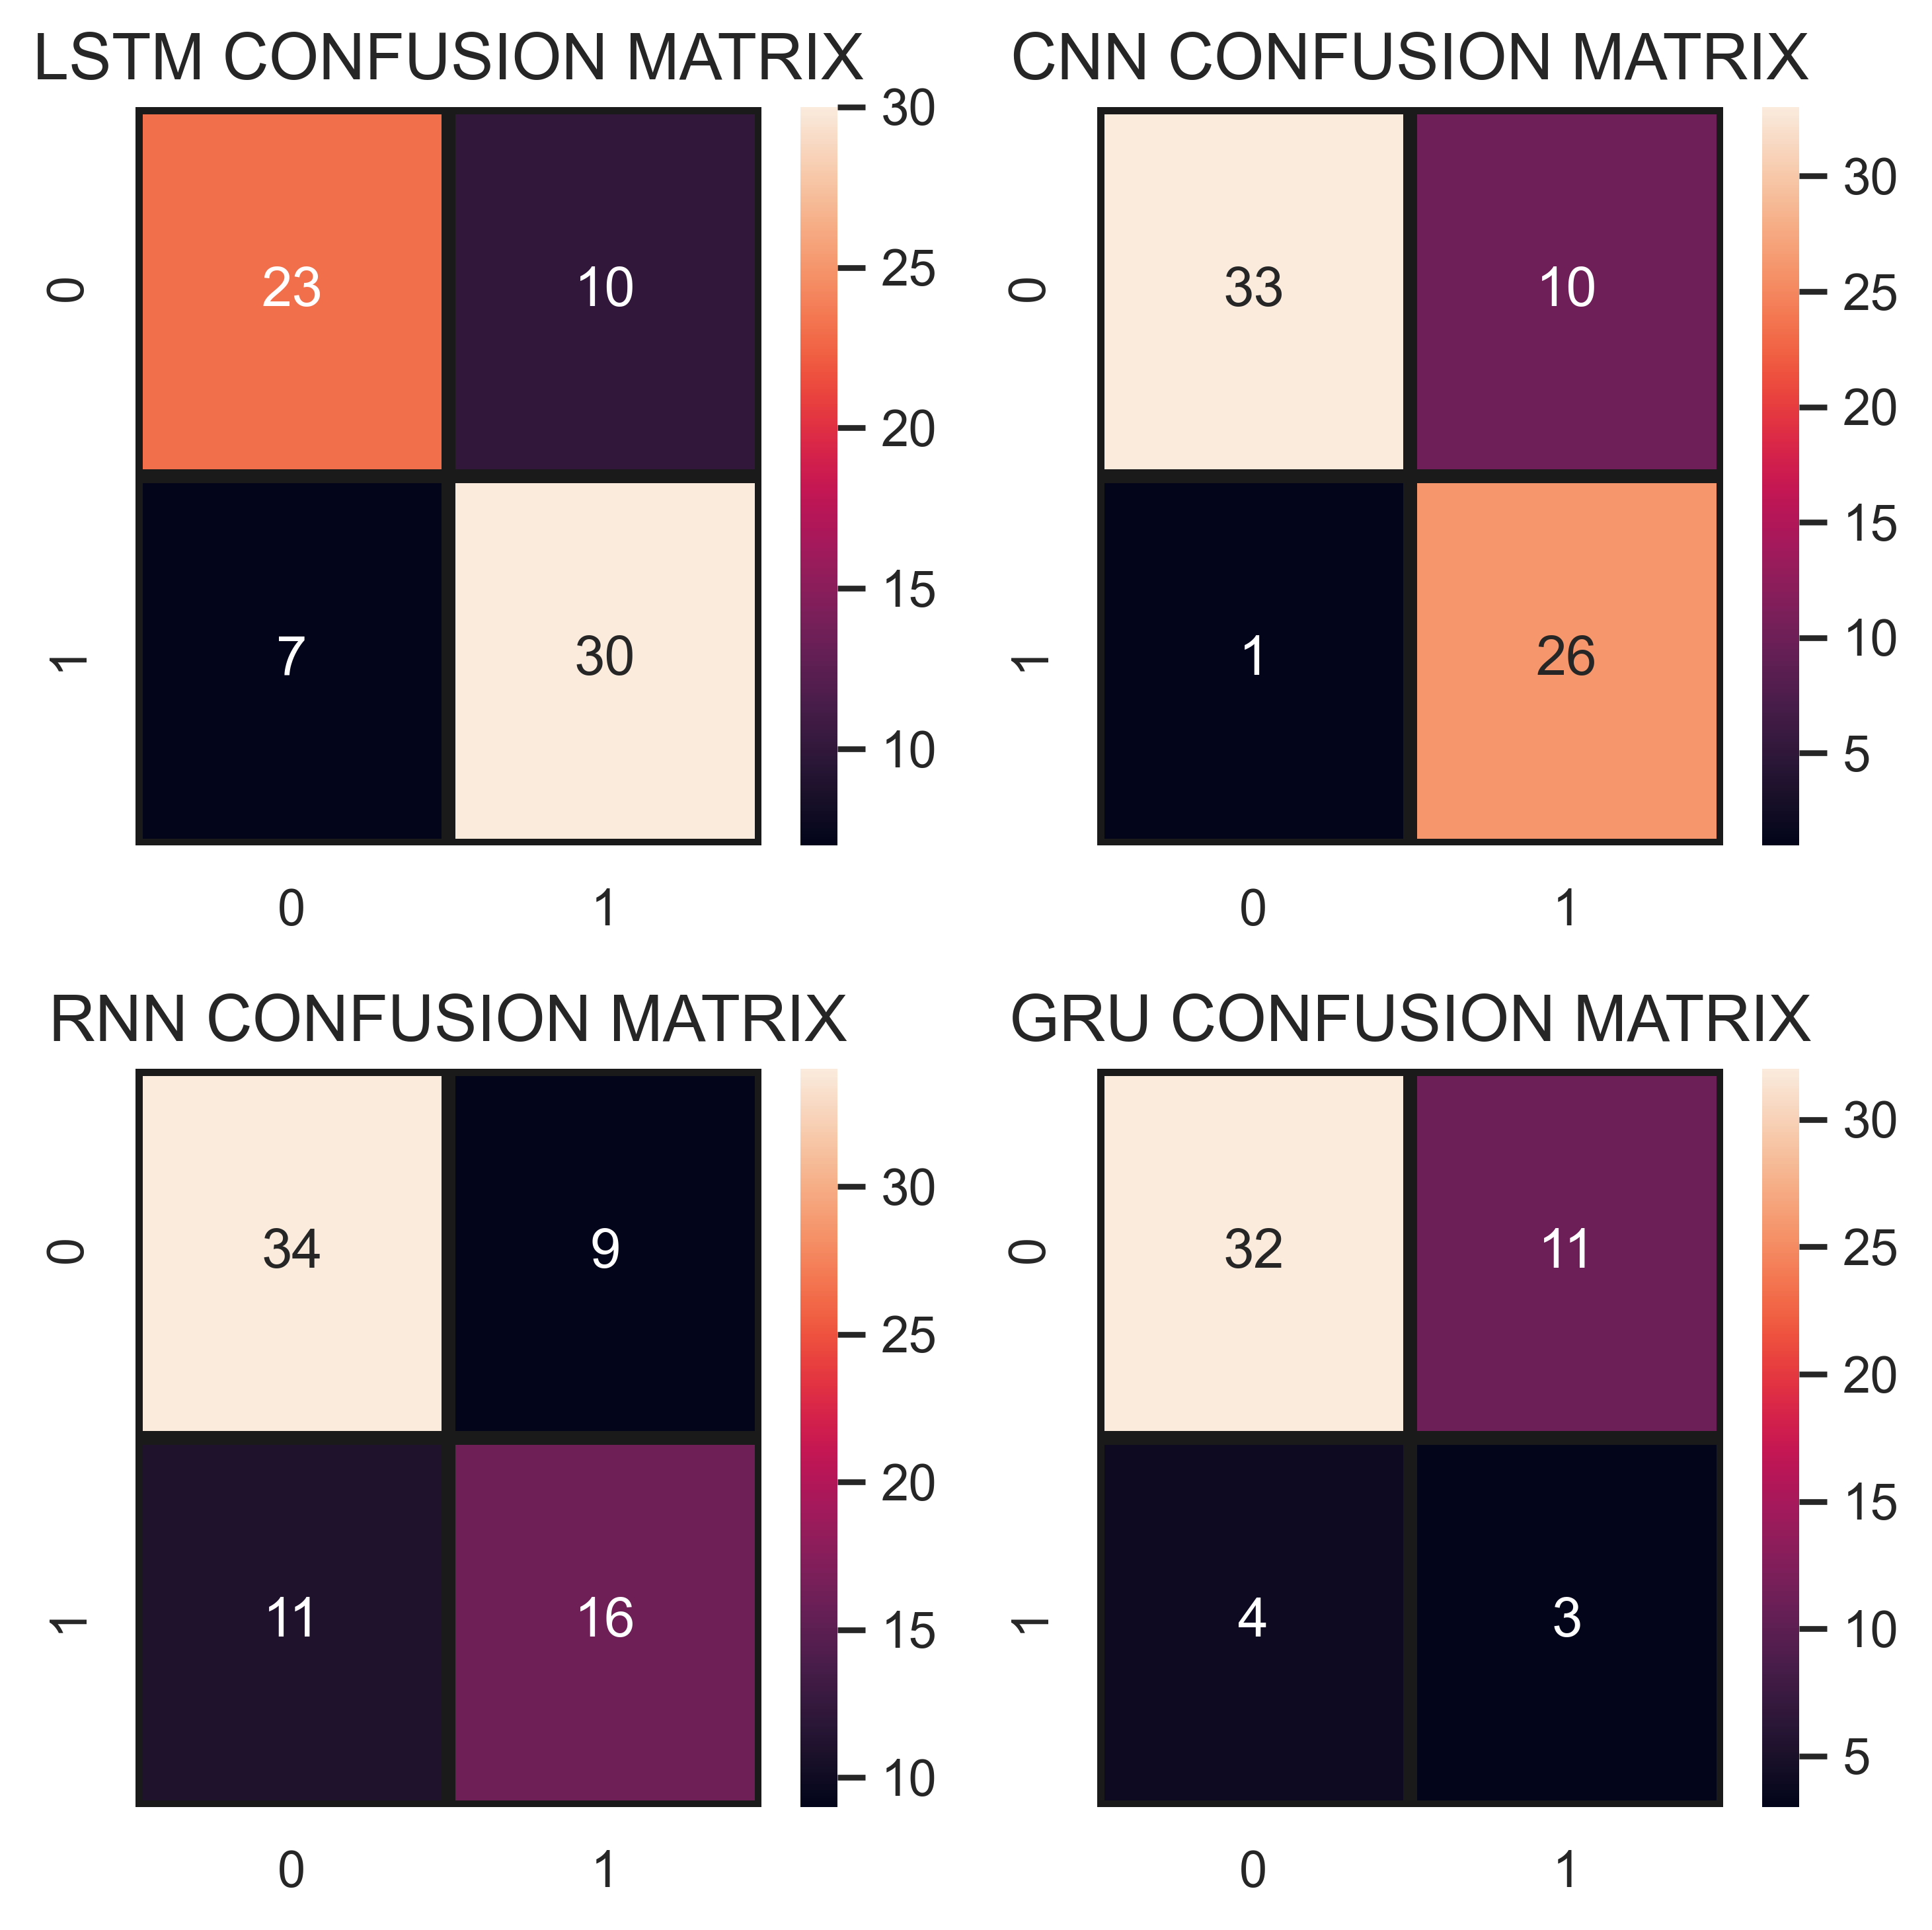

In [212]:
import seaborn as sns
import pandas as pd
array = [[23,10],[7,30]]
LSTM = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])

array1 = [[33,10],[1,26]]
CNN = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])
array2 = [[34,9],[11,16]]
RNN = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])
array3 = [[32,11],[4,3]]
GRU = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A +" CONFUSION MATRIX",fontsize=14)

plt.figure(1,figsize=(6,6),dpi=500)
plt.subplot(221) 
plot_sub_sentiment(LSTM,'LSTM')
plt.subplot(222)
plot_sub_sentiment(CNN,'CNN')
plt.subplot(223)
plot_sub_sentiment(RNN,'RNN')
plt.subplot(224)
plot_sub_sentiment(GRU,'GRU')


plt.tight_layout()
plt.savefig('Before.png')

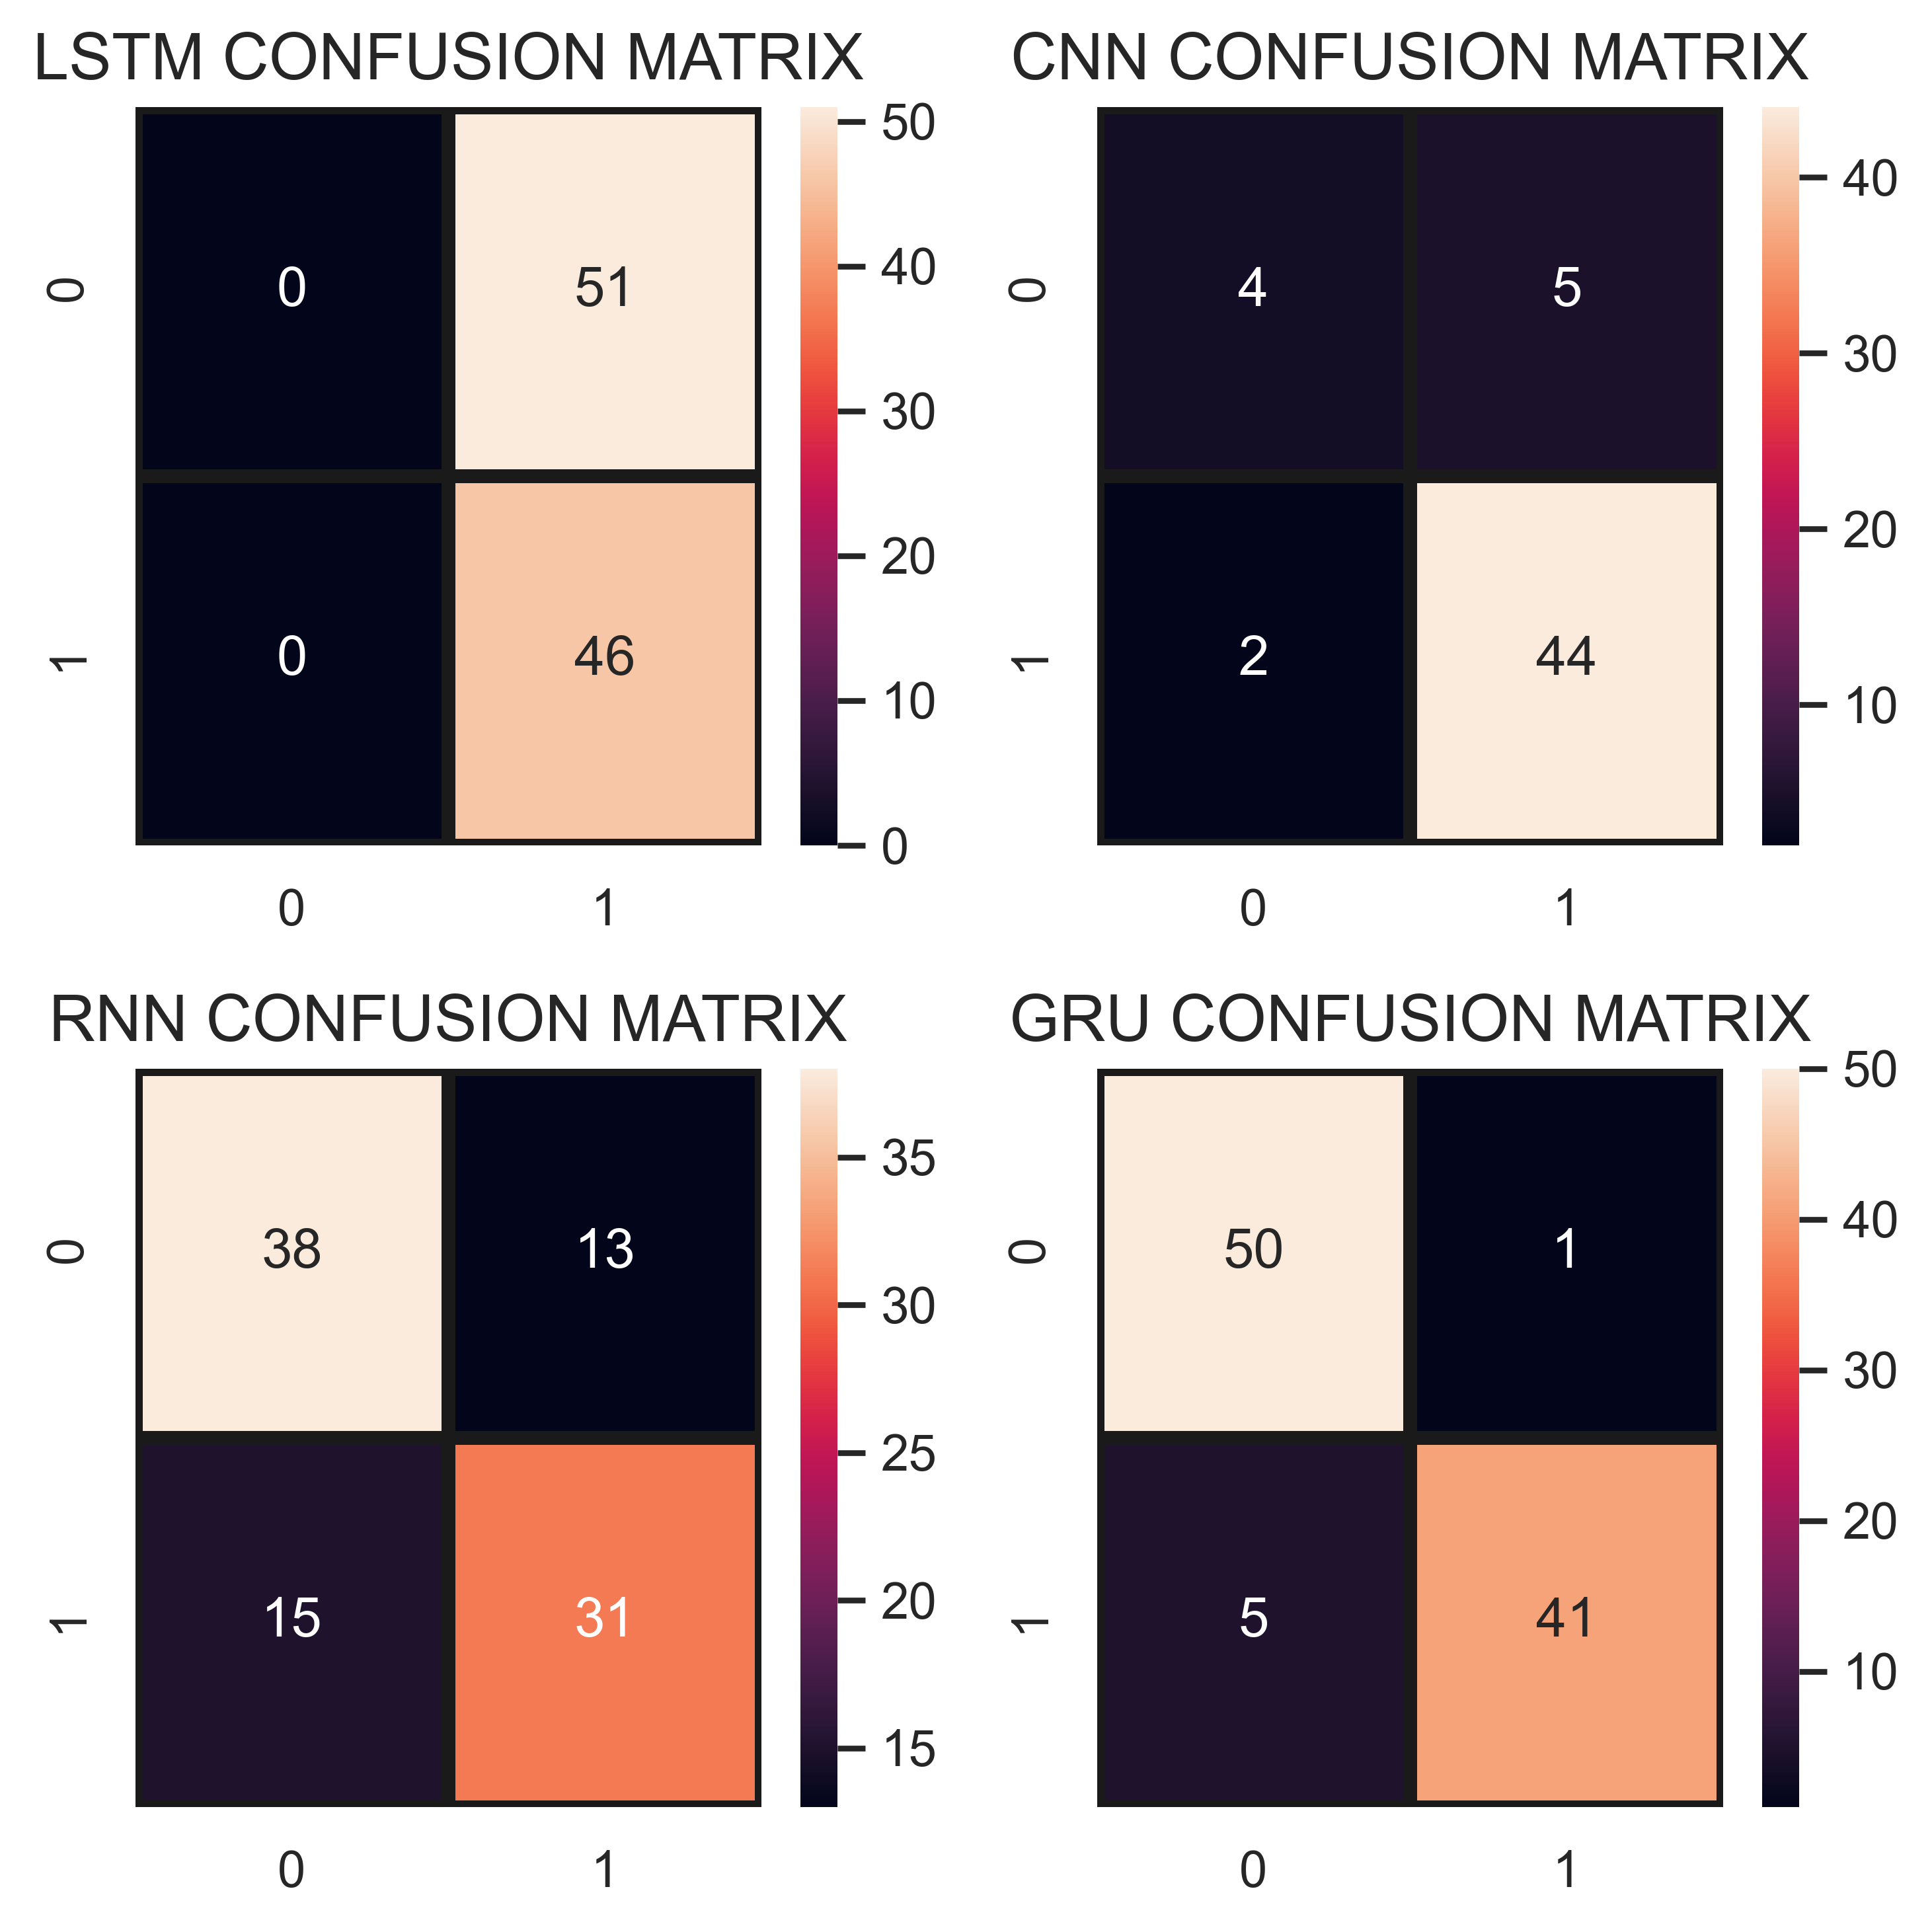

In [213]:
import seaborn as sns
import pandas as pd
array = [[0,51],[0,46]]
LSTM = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])

array1 = [[4,5],[2,44]]
CNN = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])
array2 = [[38,13],[15,31]]
RNN = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])
array3 = [[50,1],[5,41]]
GRU = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A +" CONFUSION MATRIX",fontsize=14)

plt.figure(1,figsize=(6, 6),dpi=500)
plt.subplot(221) 
plot_sub_sentiment(LSTM,'LSTM')
plt.subplot(222)
plot_sub_sentiment(CNN,'CNN')
plt.subplot(223)
plot_sub_sentiment(RNN,'RNN')
plt.subplot(224)
plot_sub_sentiment(GRU,'GRU')


plt.tight_layout()
plt.savefig('after.png')